In [1]:
import pandas as pd
import requests
import random
from time import sleep
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import nltk
import os
from sklearn import datasets
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from skgarden import RandomForestQuantileRegressor
from sklearn.dummy import DummyRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.model_selection import learning_curve
import matplotlib.style as style
%matplotlib inline
plt.style.use('seaborn-pastel')
%load_ext line_profiler

In [2]:
df = pd.read_pickle("Data/Prophet_Forecast.pkl")

df.head(50)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-12-17,185.905264,183.237370,187.666015,185.227394,186.579877,-0.048451,-0.133188,0.038904,0.136084,...,0.061682,-0.152256,0.259089,-0.481129,-0.719540,-0.263663,0.0,0.0,0.0,185.485817
1,2016-12-18,185.901699,183.331106,187.614137,185.234425,186.561556,0.145822,-0.117091,0.400855,0.026452,...,0.155445,-0.041927,0.397526,-0.484762,-0.771681,-0.182494,0.0,0.0,0.0,185.572382
2,2016-12-19,185.898134,184.440722,188.727721,185.244041,186.538995,-0.075774,-0.208298,0.060844,-0.236487,...,0.527546,0.163769,0.927209,0.153885,-0.128599,0.397546,0.0,0.0,0.0,186.579565
3,2016-12-20,185.894570,185.353778,189.646055,185.273412,186.514960,-0.209305,-0.575367,0.168066,0.780612,...,0.716824,0.205011,1.211015,0.991221,0.760325,1.243598,0.0,0.0,0.0,187.602615
4,2016-12-21,185.891005,184.075723,188.536861,185.303485,186.489066,0.131447,-0.105548,0.361339,0.272366,...,-0.031396,-0.680966,0.680352,0.449566,0.216059,0.725570,0.0,0.0,0.0,186.309176
5,2016-12-22,185.887441,182.939115,187.819974,185.320803,186.459281,0.571235,-0.458684,1.570288,0.074559,...,-0.128403,-0.986125,0.683980,-0.152907,-0.370003,0.050007,0.0,0.0,0.0,185.606131
6,2016-12-23,185.883876,183.434487,187.670616,185.335059,186.419816,0.072718,-0.058390,0.199897,0.111208,...,0.049285,-0.416780,0.579299,-0.475874,-0.678648,-0.244235,0.0,0.0,0.0,185.457288
7,2016-12-24,185.880312,183.988093,188.415003,185.350121,186.400038,-0.095927,-0.263698,0.077027,0.136084,...,0.715148,0.309448,1.126067,-0.481129,-0.719540,-0.263663,0.0,0.0,0.0,186.114331
8,2016-12-25,185.876747,182.859412,187.260843,185.359804,186.390003,-0.004557,-0.012528,0.003659,0.026452,...,-0.334605,-0.900777,0.241439,-0.484762,-0.771681,-0.182494,0.0,0.0,0.0,185.057380
9,2016-12-26,185.873183,183.973333,188.262039,185.383857,186.368092,0.110712,-0.088898,0.304339,-0.236487,...,0.064867,-0.183835,0.311037,0.153885,-0.128599,0.397546,0.0,0.0,0.0,186.091934


In [3]:
original_df = pd.read_pickle("Data/Fitbit_and_MFP_Cleaned.pkl")

original_df.reset_index(inplace=True)

original_df.head(50)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Fiber_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner,Weight,Net_Calories,Day_of_week
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,NaN,NaN,Friday
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,NaN,NaN,Saturday
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,NaN,-1110.2,Sunday
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,10.000000,15.000000,5.000000,40.000000,125.000000,10.000000,10.000000,186.800000,-660.1,Monday
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,1.900000,14.100000,47.700000,18.000000,48.800000,2.500000,25.400000,186.483333,-154.3,Tuesday
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,4.378022,8.345055,42.856044,11.289011,16.280220,11.697802,21.106593,186.166667,-978.3,Wednesday
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,4.000000,6.942857,31.000000,9.000000,12.935065,24.000000,23.000000,185.850000,-142.5,Thursday
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,185.533333,-1036.9,Friday
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,185.216667,-903.0,Saturday
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,184.900000,NaN,Sunday


In [4]:
orig_weight = original_df[['Date', 'Weight']]

orig_weight = pd.DataFrame(orig_weight)

orig_weight

,Date,Weight
0,2016-12-16,NaN
1,2016-12-17,NaN
2,2016-12-18,NaN
3,2016-12-19,186.800000
4,2016-12-20,186.483333
5,2016-12-21,186.166667
6,2016-12-22,185.850000
7,2016-12-23,185.533333
8,2016-12-24,185.216667
9,2016-12-25,184.900000


In [5]:
df = df.merge(orig_weight, left_on='ds', right_on='Date', how='left')

df.drop(columns=['ds'], inplace=True)

df.Date.iloc[619] = datetime.date(2018, 8, 28)
df.Weight.iloc[619] = 177.8

df

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Date,Weight
0,185.905264,183.237370,187.666015,185.227394,186.579877,-0.048451,-0.133188,0.038904,0.136084,0.038615,...,0.259089,-0.481129,-0.719540,-0.263663,0.0,0.0,0.0,185.485817,2016-12-17,NaN
1,185.901699,183.331106,187.614137,185.234425,186.561556,0.145822,-0.117091,0.400855,0.026452,0.007506,...,0.397526,-0.484762,-0.771681,-0.182494,0.0,0.0,0.0,185.572382,2016-12-18,NaN
2,185.898134,184.440722,188.727721,185.244041,186.538995,-0.075774,-0.208298,0.060844,-0.236487,-0.412853,...,0.927209,0.153885,-0.128599,0.397546,0.0,0.0,0.0,186.579565,2016-12-19,186.800000
3,185.894570,185.353778,189.646055,185.273412,186.514960,-0.209305,-0.575367,0.168066,0.780612,0.221507,...,1.211015,0.991221,0.760325,1.243598,0.0,0.0,0.0,187.602615,2016-12-20,186.483333
4,185.891005,184.075723,188.536861,185.303485,186.489066,0.131447,-0.105548,0.361339,0.272366,0.077287,...,0.680352,0.449566,0.216059,0.725570,0.0,0.0,0.0,186.309176,2016-12-21,186.166667
5,185.887441,182.939115,187.819974,185.320803,186.459281,0.571235,-0.458684,1.570288,0.074559,0.021157,...,0.683980,-0.152907,-0.370003,0.050007,0.0,0.0,0.0,185.606131,2016-12-22,185.850000
6,185.883876,183.434487,187.670616,185.335059,186.419816,0.072718,-0.058390,0.199897,0.111208,0.031556,...,0.579299,-0.475874,-0.678648,-0.244235,0.0,0.0,0.0,185.457288,2016-12-23,185.533333
7,185.880312,183.988093,188.415003,185.350121,186.400038,-0.095927,-0.263698,0.077027,0.136084,0.038615,...,1.126067,-0.481129,-0.719540,-0.263663,0.0,0.0,0.0,186.114331,2016-12-24,185.216667
8,185.876747,182.859412,187.260843,185.359804,186.390003,-0.004557,-0.012528,0.003659,0.026452,0.007506,...,0.241439,-0.484762,-0.771681,-0.182494,0.0,0.0,0.0,185.057380,2016-12-25,184.900000
9,185.873183,183.973333,188.262039,185.383857,186.368092,0.110712,-0.088898,0.304339,-0.236487,-0.412853,...,0.311037,0.153885,-0.128599,0.397546,0.0,0.0,0.0,186.091934,2016-12-26,184.250000


In [6]:
df['diff_weight'] = df['Weight'].diff()


df['diff_weight_lag1'] = df['diff_weight'].shift(1)
df['diff_weight_weekly_lag'] = df['diff_weight'].shift(7)

df.head(20)

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Date,Weight,diff_weight,diff_weight_lag1,diff_weight_weekly_lag
0,185.905264,183.237370,187.666015,185.227394,186.579877,-0.048451,-0.133188,0.038904,0.136084,0.038615,...,-0.263663,0.0,0.0,0.0,185.485817,2016-12-17,NaN,NaN,NaN,NaN
1,185.901699,183.331106,187.614137,185.234425,186.561556,0.145822,-0.117091,0.400855,0.026452,0.007506,...,-0.182494,0.0,0.0,0.0,185.572382,2016-12-18,NaN,NaN,NaN,NaN
2,185.898134,184.440722,188.727721,185.244041,186.538995,-0.075774,-0.208298,0.060844,-0.236487,-0.412853,...,0.397546,0.0,0.0,0.0,186.579565,2016-12-19,186.800000,NaN,NaN,NaN
3,185.894570,185.353778,189.646055,185.273412,186.514960,-0.209305,-0.575367,0.168066,0.780612,0.221507,...,1.243598,0.0,0.0,0.0,187.602615,2016-12-20,186.483333,-0.316667,NaN,NaN
4,185.891005,184.075723,188.536861,185.303485,186.489066,0.131447,-0.105548,0.361339,0.272366,0.077287,...,0.725570,0.0,0.0,0.0,186.309176,2016-12-21,186.166667,-0.316667,-0.316667,NaN
5,185.887441,182.939115,187.819974,185.320803,186.459281,0.571235,-0.458684,1.570288,0.074559,0.021157,...,0.050007,0.0,0.0,0.0,185.606131,2016-12-22,185.850000,-0.316667,-0.316667,NaN
6,185.883876,183.434487,187.670616,185.335059,186.419816,0.072718,-0.058390,0.199897,0.111208,0.031556,...,-0.244235,0.0,0.0,0.0,185.457288,2016-12-23,185.533333,-0.316667,-0.316667,NaN
7,185.880312,183.988093,188.415003,185.350121,186.400038,-0.095927,-0.263698,0.077027,0.136084,0.038615,...,-0.263663,0.0,0.0,0.0,186.114331,2016-12-24,185.216667,-0.316667,-0.316667,NaN
8,185.876747,182.859412,187.260843,185.359804,186.390003,-0.004557,-0.012528,0.003659,0.026452,0.007506,...,-0.182494,0.0,0.0,0.0,185.057380,2016-12-25,184.900000,-0.316667,-0.316667,NaN
9,185.873183,183.973333,188.262039,185.383857,186.368092,0.110712,-0.088898,0.304339,-0.236487,-0.412853,...,0.397546,0.0,0.0,0.0,186.091934,2016-12-26,184.250000,-0.650000,-0.316667,NaN


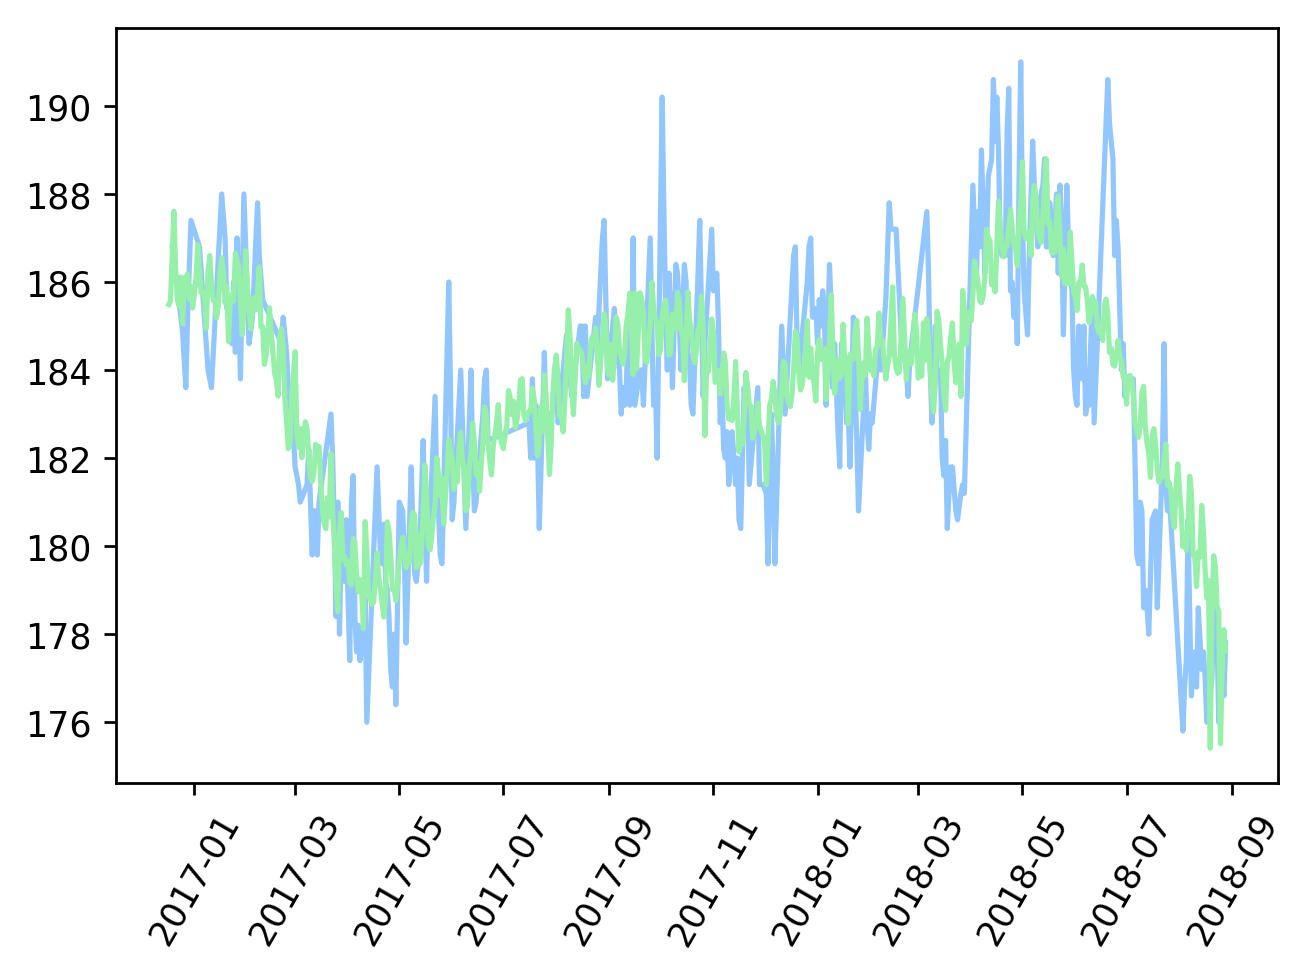

In [7]:
plt.figure(dpi=250)

plt.plot(df.Date,df.Weight)
plt.plot(df.Date, df.yhat)

plt.xticks(rotation=60);

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text xticklabel objects>)

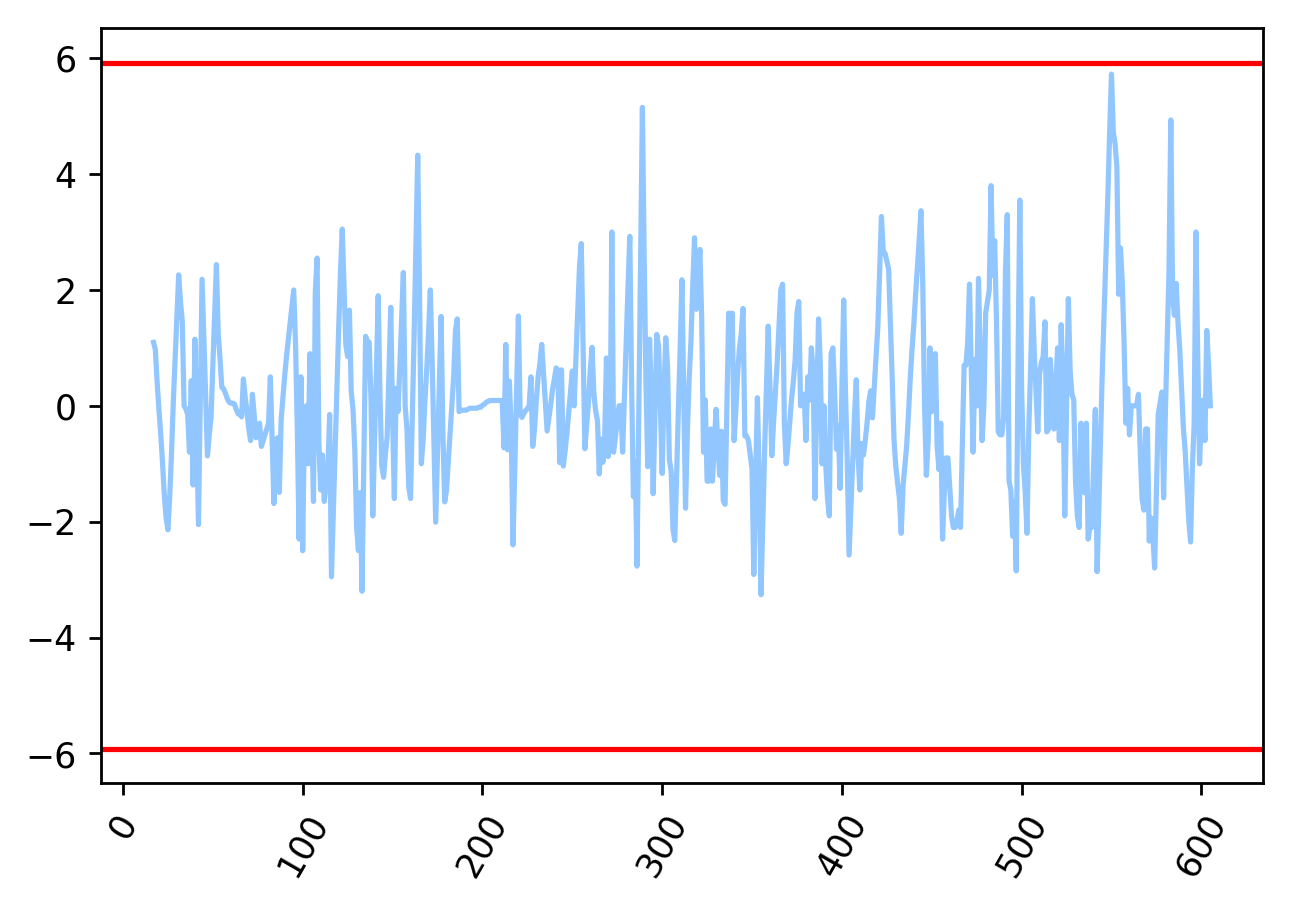

In [8]:
df['Median_Weight'] = df['Weight'].rolling(30, center=True).median()
df['Std_Weight'] = df['Weight'].rolling(30, center=True).std()
std_dev = df['Weight'].std()

df['residual'] = df['Weight'] - df['Median_Weight']

plt.figure(dpi=250)
plt.plot(df['residual'])
plt.gca().axhline(2*std_dev, c='r')
plt.gca().axhline(-2*std_dev, c='r')
plt.xticks(rotation=60)

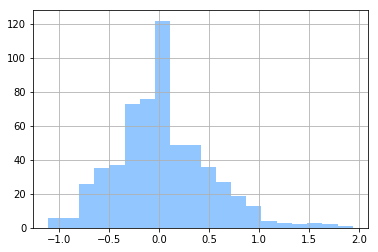

In [9]:
df['z'] = df['residual'] / std_dev
df['z'].hist(bins=20);

In [10]:
print('0 diffs:', df['Weight'].std())
print('1 diffs:', df['Weight'].diff().std())
print('2 diffs:', df['Weight'].diff().diff().std())
print('3 diffs:', df['Weight'].diff().diff().diff().std())

0 diffs: 2.9615596165905727
1 diffs: 1.1609075164746756
2 diffs: 1.6591507391615703
3 diffs: 2.7833121630539264


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text xticklabel objects>)

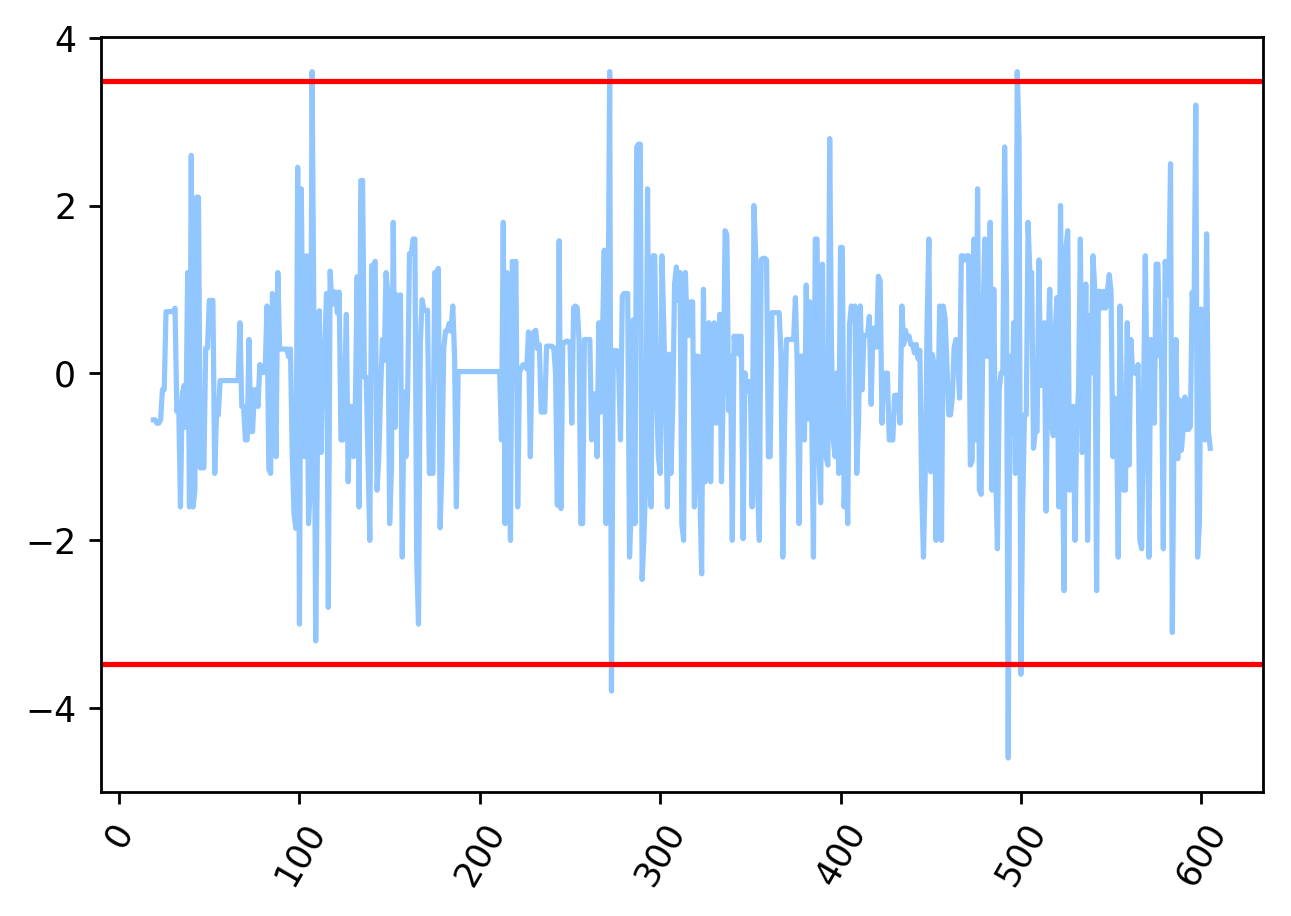

In [11]:
df['Median_Weight'] = df['Weight'].diff().rolling(30, center=True).median()
df['Std_Weight'] = df['Weight'].diff().rolling(30, center=True).std()
std_dev = df['Weight'].diff().std()

df['residual'] = df['Weight'].diff() - df['Median_Weight'].diff()

plt.figure(dpi=250)
plt.plot(df['residual'])
plt.gca().axhline(3*std_dev, c='r')
plt.gca().axhline(-3*std_dev, c='r')
plt.xticks(rotation=60)

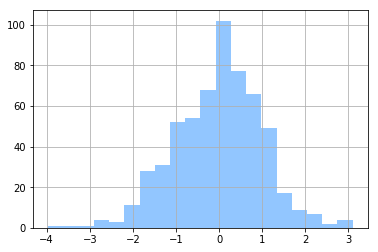

In [12]:
df['z'] = df['residual'] / std_dev
df['z'].hist(bins=20);

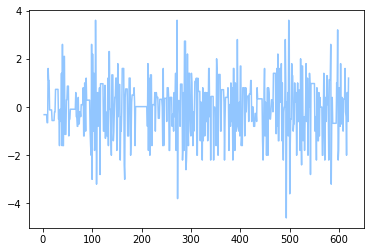

In [13]:
# Plot diff of weight over time
df.Weight.diff().plot();

In [14]:
# Plot diff of weight over time
#df.Weight_MA7.diff().diff().plot();

In [15]:
# Plot diff of weight over time
#df.Weight_MA30.diff().diff().plot();

In [16]:
print(len(df))
print(df.Weight[:150].mean())
print(df.Weight[150:300].mean())
print(df.Weight[300:450].mean())
print(df.Weight[450:].mean())

620
182.65945945945953
183.45933333333335
184.13066666666663
183.56882352941162


In [17]:
df[['Weight', 'diff_weight', 'diff_weight_lag1']]

,Weight,diff_weight,diff_weight_lag1
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,186.800000,NaN,NaN
3,186.483333,-0.316667,NaN
4,186.166667,-0.316667,-0.316667
5,185.850000,-0.316667,-0.316667
6,185.533333,-0.316667,-0.316667
7,185.216667,-0.316667,-0.316667
8,184.900000,-0.316667,-0.316667
9,184.250000,-0.650000,-0.316667


In [18]:
for i in range(1,8):
    df[f'Weight_lag{i}'] = df['Weight'].shift(i)
    
for i in range(1,8):
    df[f'Prophet_pred_lag{i}'] = df['yhat'].shift(i)

X = df.iloc[:,-6:]
X.head(20)

,Prophet_pred_lag2,Prophet_pred_lag3,Prophet_pred_lag4,Prophet_pred_lag5,Prophet_pred_lag6,Prophet_pred_lag7
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,185.485817,NaN,NaN,NaN,NaN,NaN
3,185.572382,185.485817,NaN,NaN,NaN,NaN
4,186.579565,185.572382,185.485817,NaN,NaN,NaN
5,187.602615,186.579565,185.572382,185.485817,NaN,NaN
6,186.309176,187.602615,186.579565,185.572382,185.485817,NaN
7,185.606131,186.309176,187.602615,186.579565,185.572382,185.485817
8,185.457288,185.606131,186.309176,187.602615,186.579565,185.572382
9,186.114331,185.457288,185.606131,186.309176,187.602615,186.579565


In [19]:
df['Weight']

0             NaN
1             NaN
2      186.800000
3      186.483333
4      186.166667
5      185.850000
6      185.533333
7      185.216667
8      184.900000
9      184.250000
10     183.600000
11     185.200000
12     186.300000
13     187.400000
14     187.280000
15     187.160000
16     187.040000
17     186.920000
18     186.800000
19     186.240000
20     185.680000
21     185.120000
22     184.560000
23     184.000000
24     183.800000
25     183.600000
26     184.333333
27     185.066667
28     185.800000
29     186.533333
          ...    
590    178.500000
591    177.825000
592    177.150000
593    176.475000
594    175.800000
595    176.800000
596    177.400000
597    180.600000
598    178.400000
599    176.600000
600    177.400000
601    177.600000
602    176.800000
603    178.600000
604    177.900000
605    177.200000
606    177.600000
607    177.000000
608    176.000000
609    176.333333
610    176.666667
611    177.000000
612    178.600000
613    178.400000
614    178

In [20]:
# for i in range(2,8):
#     df[f'diff_weight_MA{i}'] = df['diff_weight_lag1'].rolling(window=i).mean()

# X = df[['Weight', 'diff_weight', 'diff_weight_lag1', 'diff_weight_lag2', 'diff_weight_lag3',
#              'diff_weight_lag4', 'diff_weight_lag5', 'diff_weight_MA2',
#              'diff_weight_MA3', 'diff_weight_MA4', 'diff_weight_MA5', 'diff_weight_MA6', 'diff_weight_MA7']]
# X.head(20)

## CREATE FINAL HOLDOUT TEST SET (LASTMONTH)

In [21]:
df.Weight[-45:]

575    179.300000
576    180.600000
577    180.700000
578    180.800000
579    178.600000
580    179.733333
581    180.866667
582    182.000000
583    184.600000
584    181.400000
585    180.800000
586    181.200000
587    180.525000
588    179.850000
589    179.175000
590    178.500000
591    177.825000
592    177.150000
593    176.475000
594    175.800000
595    176.800000
596    177.400000
597    180.600000
598    178.400000
599    176.600000
600    177.400000
601    177.600000
602    176.800000
603    178.600000
604    177.900000
605    177.200000
606    177.600000
607    177.000000
608    176.000000
609    176.333333
610    176.666667
611    177.000000
612    178.600000
613    178.400000
614    178.000000
615    176.000000
616    176.600000
617    177.200000
618    176.600000
619    177.800000
Name: Weight, dtype: float64

In [22]:
train_df = df[:575]

holdout_df = df[575:]

In [23]:
# eighty_percent

In [24]:
df

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,Weight_lag5,Weight_lag6,Weight_lag7,Prophet_pred_lag1,Prophet_pred_lag2,Prophet_pred_lag3,Prophet_pred_lag4,Prophet_pred_lag5,Prophet_pred_lag6,Prophet_pred_lag7
0,185.905264,183.237370,187.666015,185.227394,186.579877,-0.048451,-0.133188,0.038904,0.136084,0.038615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,185.901699,183.331106,187.614137,185.234425,186.561556,0.145822,-0.117091,0.400855,0.026452,0.007506,...,NaN,NaN,NaN,185.485817,NaN,NaN,NaN,NaN,NaN,NaN
2,185.898134,184.440722,188.727721,185.244041,186.538995,-0.075774,-0.208298,0.060844,-0.236487,-0.412853,...,NaN,NaN,NaN,185.572382,185.485817,NaN,NaN,NaN,NaN,NaN
3,185.894570,185.353778,189.646055,185.273412,186.514960,-0.209305,-0.575367,0.168066,0.780612,0.221507,...,NaN,NaN,NaN,186.579565,185.572382,185.485817,NaN,NaN,NaN,NaN
4,185.891005,184.075723,188.536861,185.303485,186.489066,0.131447,-0.105548,0.361339,0.272366,0.077287,...,NaN,NaN,NaN,187.602615,186.579565,185.572382,185.485817,NaN,NaN,NaN
5,185.887441,182.939115,187.819974,185.320803,186.459281,0.571235,-0.458684,1.570288,0.074559,0.021157,...,NaN,NaN,NaN,186.309176,187.602615,186.579565,185.572382,185.485817,NaN,NaN
6,185.883876,183.434487,187.670616,185.335059,186.419816,0.072718,-0.058390,0.199897,0.111208,0.031556,...,NaN,NaN,NaN,185.606131,186.309176,187.602615,186.579565,185.572382,185.485817,NaN
7,185.880312,183.988093,188.415003,185.350121,186.400038,-0.095927,-0.263698,0.077027,0.136084,0.038615,...,186.800000,NaN,NaN,185.457288,185.606131,186.309176,187.602615,186.579565,185.572382,185.485817
8,185.876747,182.859412,187.260843,185.359804,186.390003,-0.004557,-0.012528,0.003659,0.026452,0.007506,...,186.483333,186.800000,NaN,186.114331,185.457288,185.606131,186.309176,187.602615,186.579565,185.572382
9,185.873183,183.973333,188.262039,185.383857,186.368092,0.110712,-0.088898,0.304339,-0.236487,-0.412853,...,186.166667,186.483333,186.800000,185.057380,186.114331,185.457288,185.606131,186.309176,187.602615,186.579565


In [25]:
holdout_df

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,Weight_lag5,Weight_lag6,Weight_lag7,Prophet_pred_lag1,Prophet_pred_lag2,Prophet_pred_lag3,Prophet_pred_lag4,Prophet_pred_lag5,Prophet_pred_lag6,Prophet_pred_lag7
575,182.443203,179.470710,183.688316,181.842757,182.963574,0.136887,-0.109916,0.376294,0.026452,0.007506,...,180.800000,181.000000,179.600000,182.121659,182.323273,182.695405,183.631114,183.496589,182.729663,182.470286
576,182.354835,180.395406,184.865300,181.732311,182.885214,0.110712,-0.088898,0.304339,0.345647,0.098081,...,178.600000,180.800000,181.000000,181.562079,182.121659,182.323273,182.695405,183.631114,183.496589,182.729663
577,182.266467,180.392690,184.897988,181.620634,182.830130,-0.239474,-0.658297,0.192290,-0.051814,-0.090456,...,179.000000,178.600000,180.800000,182.528516,181.562079,182.121659,182.323273,182.695405,183.631114,183.496589
578,182.178099,180.067540,184.579475,181.510718,182.746808,-0.239474,-0.658297,0.192290,-0.013059,-0.022798,...,178.600000,179.000000,178.600000,182.669194,182.528516,181.562079,182.121659,182.323273,182.695405,183.631114
579,182.089730,179.595057,183.817345,181.407443,182.696061,-0.132278,-0.363622,0.106215,0.074559,0.021157,...,178.000000,178.600000,179.000000,182.307784,182.669194,182.528516,181.562079,182.121659,182.323273,182.695405
580,182.001362,179.196730,183.777673,181.304169,182.638565,-0.060195,-0.165473,0.048335,0.136944,0.038859,...,179.300000,178.000000,178.600000,181.761571,182.307784,182.669194,182.528516,181.562079,182.121659,182.323273
581,181.912994,179.390428,183.820230,181.193917,182.552786,-0.048451,-0.133188,0.038904,0.136084,0.038615,...,180.600000,179.300000,178.000000,181.455003,181.761571,182.307784,182.669194,182.528516,181.562079,182.121659
582,181.824626,179.504901,183.720500,181.097050,182.492054,0.145822,-0.117091,0.400855,0.026452,0.007506,...,180.700000,180.600000,179.300000,181.593076,181.455003,181.761571,182.307784,182.669194,182.528516,181.562079
583,181.736258,179.931382,184.133514,180.976443,182.422918,0.110712,-0.088898,0.304339,-0.236487,-0.412853,...,180.800000,180.700000,180.600000,181.571443,181.593076,181.455003,181.761571,182.307784,182.669194,182.528516
584,181.647889,180.214010,184.418380,180.879584,182.352442,-0.060195,-0.165473,0.048335,0.190828,0.054150,...,178.600000,180.800000,180.700000,181.963810,181.571443,181.593076,181.455003,181.761571,182.307784,182.669194


In [26]:
# print Sales autocorrelation for k=1,2
print(train_df.Weight.diff().autocorr(lag=1)) 
print(train_df.Weight.diff().autocorr(lag=2))
print(train_df.Weight.diff().autocorr(lag=3)) 
print(train_df.Weight.diff().autocorr(lag=4))
print(train_df.Weight.diff().autocorr(lag=5)) 
print(train_df.Weight.diff().autocorr(lag=6))
print(train_df.Weight.diff().autocorr(lag=7)) 

-0.015051564114209569
-0.21388301485944602
-0.06745827957562922
-0.13041413527537593
-0.08900470420897995
0.10077981097998027
0.13588184850277404


In [27]:
df.columns

Index(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Calories_Breakfast', 'Calories_Breakfast_lower',
       'Calories_Breakfast_upper', 'Calories_Dinner', 'Calories_Dinner_lower',
       ...
       'Weight_lag5', 'Weight_lag6', 'Weight_lag7', 'Prophet_pred_lag1',
       'Prophet_pred_lag2', 'Prophet_pred_lag3', 'Prophet_pred_lag4',
       'Prophet_pred_lag5', 'Prophet_pred_lag6', 'Prophet_pred_lag7'],
      dtype='object', length=146)

In [28]:
# # print Sales autocorrelation for k=1,2
# print(train_df.diff_weight_MA_7.autocorr(lag=1)) 
# print(train_df.diff_weight_MA_7.autocorr(lag=2))
# print(train_df.diff_weight_MA_7.autocorr(lag=3)) 
# print(train_df.diff_weight_MA_7.autocorr(lag=4))
# print(train_df.diff_weight_MA_7.autocorr(lag=5)) 
# print(train_df.diff_weight_MA_7.autocorr(lag=6))
# print(train_df.diff_weight_MA_7.autocorr(lag=7)) 

In [29]:
# create autocorr plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # better and more arguments

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


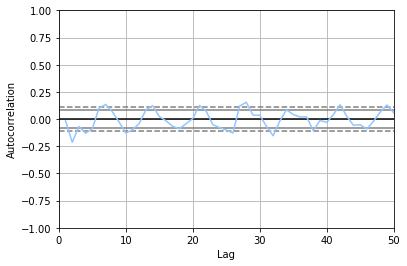

In [30]:
autocorrelation_plot(train_df.Weight.diff()[4:])
plt.xlim(0,50);
# we see corr at 12 and 24 because Sundays are all closed for store 1, so weeks are now six days long

Figure(432x288)
Figure(432x288)


<Figure size 900x600 with 0 Axes>

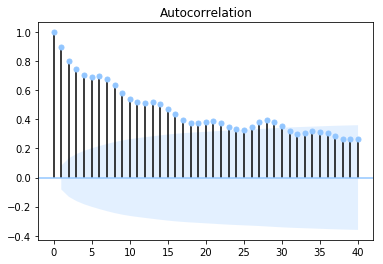

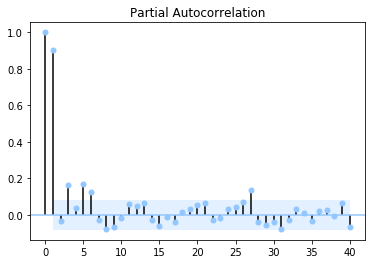

In [31]:
# create autocorr plot
# plot autocorr with statsmodel
plt.figure(dpi=150)
print(plot_acf(train_df.Weight.dropna(), lags=40)) # these are for non-stationary data, so we can see patterns, but generally ignore
print(plot_pacf(train_df.Weight.dropna(), lags=40))

In [32]:
# from  statsmodels.tsa.seasonal  import seasonal_decompose
# ss_decomposition = seasonal_decompose(x=train_df.Weight[4:], 
#                                       model='additive')
# trend = ss_decomposition.trend
# seasonal = ss_decomposition.seasonal
# residual = ss_decomposition.resid

# fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
# fig.set_figheight(10)
# fig.set_figwidth(15)

# axes[0].plot(train_df.Weight, 'k', label='Original')
# axes[0].legend(loc='upper left');

# axes[1].plot(trend, label='Trend')
# axes[1].legend(loc='upper left');

# axes[2].plot(seasonal, 'g', label='Seasonality')
# axes[2].legend(loc='upper left');

# axes[3].plot(residual, 'r', label='Residuals')
# axes[3].legend(loc='upper left')

In [33]:
# from  statsmodels.tsa.seasonal  import seasonal_decompose
# ss_decomposition = seasonal_decompose(x=train_df.diff_weight.dropna(), 
#                                       model='additive')
# trend = ss_decomposition.trend
# seasonal = ss_decomposition.seasonal
# residual = ss_decomposition.resid

# fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
# fig.set_figheight(10)
# fig.set_figwidth(15)

# axes[0].plot(train_df.diff_weight, 'k', label='Original')
# axes[0].legend(loc='upper left');

# axes[1].plot(trend, label='Trend')
# axes[1].legend(loc='upper left');

# axes[2].plot(seasonal, 'g', label='Seasonality')
# axes[2].legend(loc='upper left');

# axes[3].plot(residual, 'r', label='Residuals')
# axes[3].legend(loc='upper left')

In [34]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7, center=True).mean()
    rolstd = timeseries.rolling(window=7, center=True).std()

    #Plot rolling statistics:
    plt.figure(dpi=150)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    
    plt.draw()
    plt.legend(loc='best')
    plt.xticks(rotation=60)
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    timeseries.dropna(inplace=True)
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

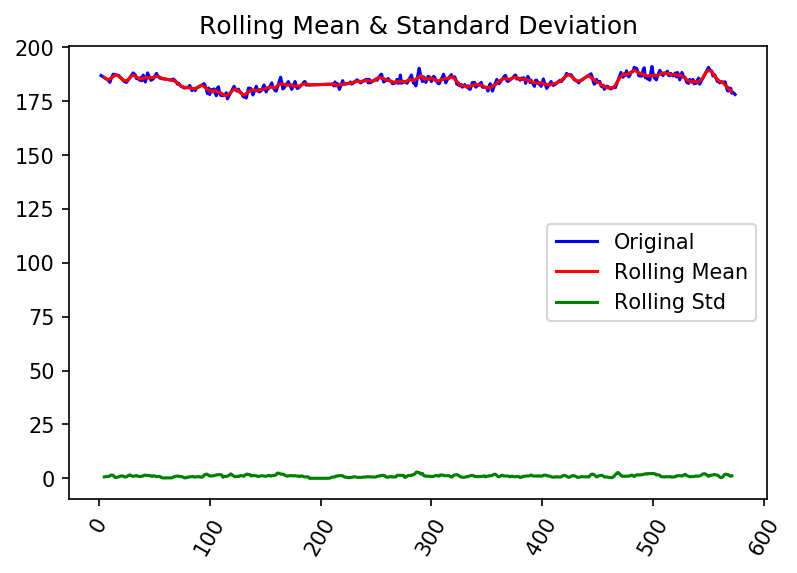

Results of Dickey-Fuller Test:
Test Statistic                  -3.120839
p-value                          0.025049
#Lags Used                       8.000000
Number of Observations Used    564.000000
Critical Value (1%)             -3.441998
Critical Value (5%)             -2.866678
Critical Value (10%)            -2.569506
dtype: float64


/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [35]:
test_stationarity(train_df.Weight)

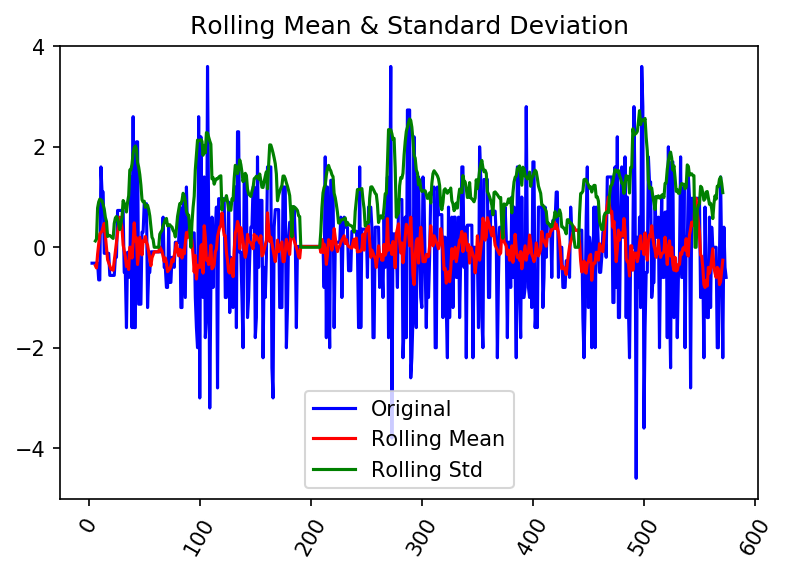

Results of Dickey-Fuller Test:
Test Statistic                -8.602366e+00
p-value                        6.814521e-14
#Lags Used                     1.100000e+01
Number of Observations Used    5.600000e+02
Critical Value (1%)           -3.442081e+00
Critical Value (5%)           -2.866715e+00
Critical Value (10%)          -2.569526e+00
dtype: float64


/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [36]:
test_stationarity(train_df.diff_weight)

In [37]:
train_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,Weight_lag5,Weight_lag6,Weight_lag7,Prophet_pred_lag1,Prophet_pred_lag2,Prophet_pred_lag3,Prophet_pred_lag4,Prophet_pred_lag5,Prophet_pred_lag6,Prophet_pred_lag7
0,185.905264,183.237370,187.666015,185.227394,186.579877,-0.048451,-0.133188,0.038904,0.136084,0.038615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,185.901699,183.331106,187.614137,185.234425,186.561556,0.145822,-0.117091,0.400855,0.026452,0.007506,...,NaN,NaN,NaN,185.485817,NaN,NaN,NaN,NaN,NaN,NaN
2,185.898134,184.440722,188.727721,185.244041,186.538995,-0.075774,-0.208298,0.060844,-0.236487,-0.412853,...,NaN,NaN,NaN,185.572382,185.485817,NaN,NaN,NaN,NaN,NaN
3,185.894570,185.353778,189.646055,185.273412,186.514960,-0.209305,-0.575367,0.168066,0.780612,0.221507,...,NaN,NaN,NaN,186.579565,185.572382,185.485817,NaN,NaN,NaN,NaN
4,185.891005,184.075723,188.536861,185.303485,186.489066,0.131447,-0.105548,0.361339,0.272366,0.077287,...,NaN,NaN,NaN,187.602615,186.579565,185.572382,185.485817,NaN,NaN,NaN


In [38]:
# df2 = df[np.isfinite(df['diff_weight'])]

In [39]:
# df2

In [40]:
# ar1 = LinearRegression()

# X = df2.iloc[1:, -1].values.reshape(-1,1)
# target= df2['diff_weight'].values[1:]
# ar1.fit(X[:], target[:])

# plt.figure(dpi=250)
# plt.plot(df2.index[1:], target, label='actual')
# plt.plot(df2.index[1:], ar1.predict(X[:]), label='predicted')
# plt.xticks(rotation=60)
# plt.xlabel('Date')
# plt.ylabel('diff_weight')
# plt.title('Time Series of Weight (1 Day RWindow)')

In [41]:
# ar1.score(X[1:], target[1:])

In [42]:
for i in range(1,6):
    train_df[f'lag{i}'] = train_df['diff_weight'].shift(i)

X = train_df.iloc[:,-7:]
X.head(20)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Prophet_pred_lag6,Prophet_pred_lag7,lag1,lag2,lag3,lag4,lag5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-0.316667,NaN,NaN,NaN,NaN
5,NaN,NaN,-0.316667,-0.316667,NaN,NaN,NaN
6,185.485817,NaN,-0.316667,-0.316667,-0.316667,NaN,NaN
7,185.572382,185.485817,-0.316667,-0.316667,-0.316667,-0.316667,NaN
8,186.579565,185.572382,-0.316667,-0.316667,-0.316667,-0.316667,-0.316667
9,187.602615,186.579565,-0.316667,-0.316667,-0.316667,-0.316667,-0.316667


In [43]:
X = X.dropna()
y = train_df.loc[X.index[:-1], 'diff_weight']
X = X[:-1]

ar7 = LinearRegression()
ar7.fit(X, y)
ar7.score(X,y)

0.1382138580953517

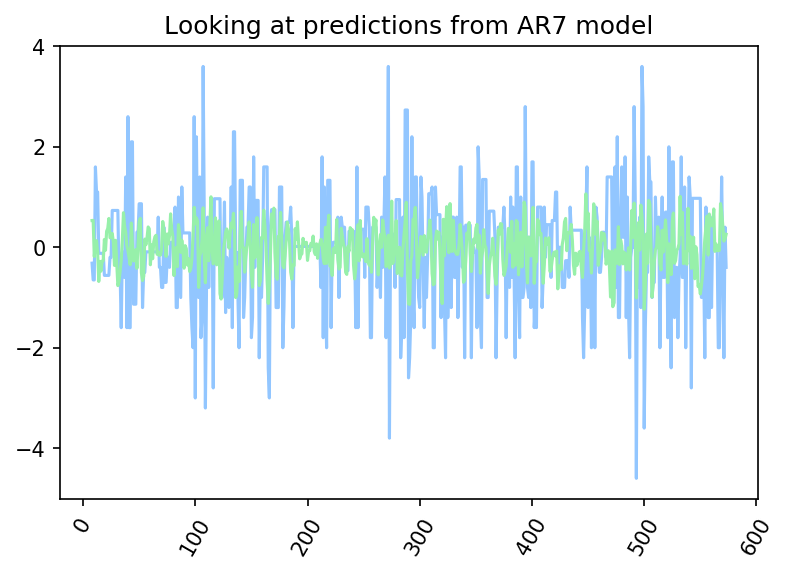

In [44]:
plt.figure(dpi=150)
plt.plot(X.index, y)
plt.plot(X.index, ar7.predict(X))
plt.title("Looking at predictions from AR7 model")
plt.xticks(rotation=60);

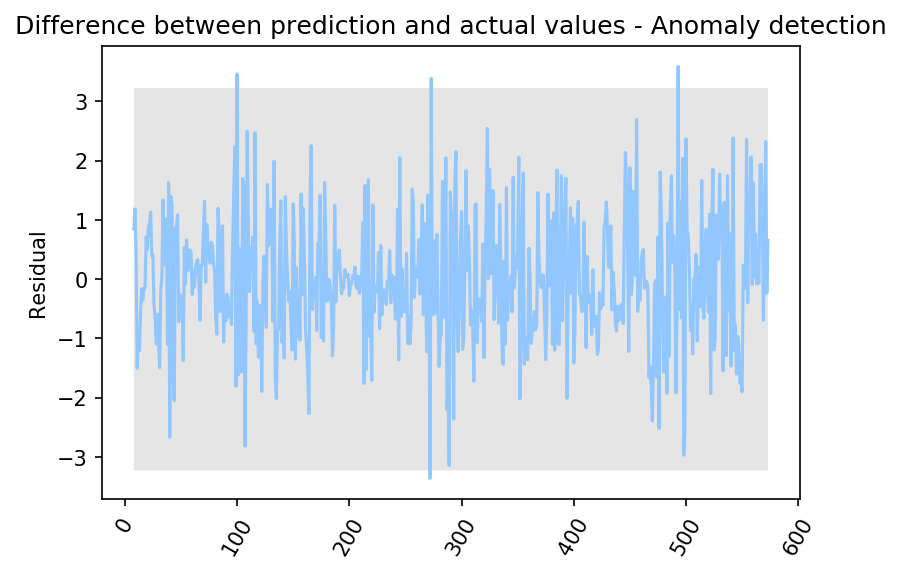

In [45]:
# Let's look at differences from the prediction:
residual = ar7.predict(X) - y
std_residual = np.std(residual)

plt.figure(dpi=150)
plt.plot(X.index, ar7.predict(X) - y)
plt.gca().fill_between(X.index, 3*std_residual, -3*std_residual, facecolor='gray', alpha=0.2)
plt.title("Difference between prediction and actual values - Anomaly detection")
plt.ylabel("Residual")
plt.xticks(rotation=60);

## POTENTIAL TO PRUNE ANOMALIES FOUND ABOVE

##### 2017-04 AND 2017-10

In [46]:
train_df['diff_weight'].values

array([        nan,         nan,         nan, -0.31666667, -0.31666667,
       -0.31666667, -0.31666667, -0.31666667, -0.31666667, -0.65      ,
       -0.65      ,  1.6       ,  1.1       ,  1.1       , -0.12      ,
       -0.12      , -0.12      , -0.12      , -0.12      , -0.56      ,
       -0.56      , -0.56      , -0.56      , -0.56      , -0.2       ,
       -0.2       ,  0.73333333,  0.73333333,  0.73333333,  0.73333333,
        0.73333333,  0.73333333, -0.5       , -0.5       , -1.6       ,
       -0.1       , -0.1       , -0.6       ,  1.4       , -1.6       ,
        2.6       , -1.6       , -1.6       ,  2.1       ,  2.1       ,
       -1.13333333, -1.13333333, -1.13333333,  0.3       ,  0.3       ,
        0.86666667,  0.86666667,  0.86666667, -1.2       , -0.5       ,
       -0.5       , -0.09090909, -0.09090909, -0.09090909, -0.09090909,
       -0.09090909, -0.09090909, -0.09090909, -0.09090909, -0.09090909,
       -0.09090909, -0.09090909,  0.6       , -0.4       , -0.4 

In [47]:
from statsmodels.tsa.arima_model import ARMA, ARIMA

diff_weight = train_df['diff_weight'].values[8:-3]
ar7_no_ma = ARMA(diff_weight, (7,0)).fit()
ar7_no_ma.summary()

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  564
Model:                     ARMA(7, 0)   Log Likelihood                -851.068
Method:                       css-mle   S.D. of innovations              1.094
Date:                Sat, 15 Sep 2018   AIC                           1720.137
Time:                        16:48:22   BIC                           1759.152
Sample:                             0   HQIC                          1735.366
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0100      0.027     -0.370      0.712      -0.063       0.043
ar.L1.y       -0.0797      0.042     -1.889      0.059      -0.162       0.003
ar.L2.y       -0.2614      0.042     -6.174      0.000      -0.344      -0.178
ar.L3.y       -0.1127      0.043     -2.602      0.010      -0.198      -0.028
ar.L4.y       -0.1890      0.043     -4.409      0.000      -0.273      -0.105
ar.L5.y       -0.1297      0.044     -2.981      0.003      -0.215      -0.044
ar.L6.y        0.0102      0.043      0.240      0.811      -0.073       0.094
ar.L7.y        0.0643      0.042      1.515      0.130      -0.019       0.147
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4742           -0.7201j            1.6406           -0.4277
AR.2           -1.4742           +0.7201j            1.6406            0.4277
AR.3           -0.4172           -1.2771j            1.3435           -0.3003
AR.4           -0.4172           +1.2771j            1.3435            0.3003
AR.5            0.7650           -0.9718j            1.2368           -0.1439
AR.6            0.7650           +0.9718j            1.2368            0.1439
AR.7            2.0938           -0.0000j            2.0938           -0.0000
-----------------------------------------------------------------------------
"""

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


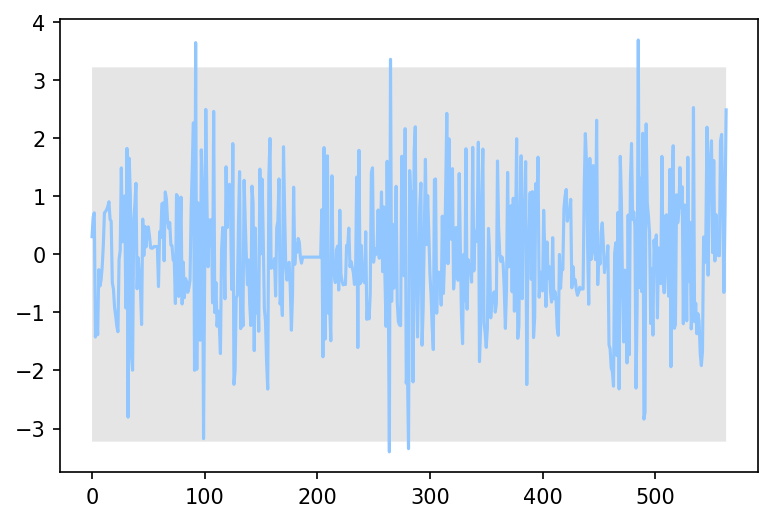

In [48]:
# plot residuals
# Same as before!
plt.figure(dpi=150)
plt.plot(-ar7_no_ma.resid)
plt.gca().fill_between(range(len(ar7_no_ma.resid)), 3*std_residual, -3*std_residual, facecolor='gray', alpha=0.2);

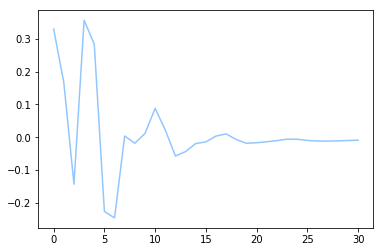

In [49]:
# forecast and plot for the next 25 periods
plt.plot(ar7_no_ma.forecast(steps=31)[0]);

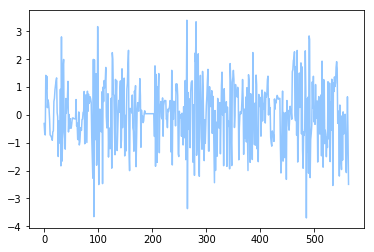

In [50]:
plt.plot(ar7_no_ma.resid);

Figure(432x288)
Figure(432x288)


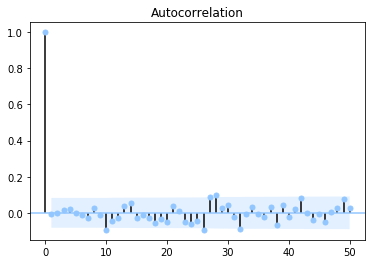

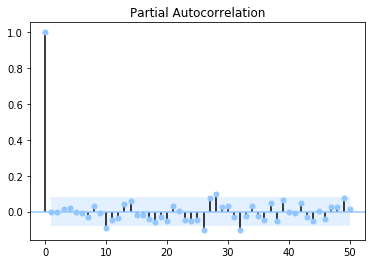

In [51]:
# plot acf and pacf
print(plot_acf(ar7_no_ma.resid, lags=50)) # small spikes and patterns show model has captured variance?
print(plot_pacf(ar7_no_ma.resid, lags=50))

In [52]:
dfw = train_df.diff_weight.astype('float')

dfWeight = train_df.Weight.astype('float')

In [53]:
type(ar7_no_ma.predict())

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


numpy.ndarray

In [54]:
#diff_weight

# plot actual vs. predicted
# plt.plot(diff_weight,label='actual')
# ar7_no_ma.predict(start=len(diff_weight)//2,end=len(diff_weight)-5).plot(label='reconstruction') # this can't forecast future!!!
# plt.legend()
# plt.title("AR7 (no MA): Comparing actual to reconstruction");

In [55]:
train_df

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,Prophet_pred_lag3,Prophet_pred_lag4,Prophet_pred_lag5,Prophet_pred_lag6,Prophet_pred_lag7,lag1,lag2,lag3,lag4,lag5
0,185.905264,183.237370,187.666015,185.227394,186.579877,-0.048451,-0.133188,0.038904,0.136084,0.038615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,185.901699,183.331106,187.614137,185.234425,186.561556,0.145822,-0.117091,0.400855,0.026452,0.007506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,185.898134,184.440722,188.727721,185.244041,186.538995,-0.075774,-0.208298,0.060844,-0.236487,-0.412853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,185.894570,185.353778,189.646055,185.273412,186.514960,-0.209305,-0.575367,0.168066,0.780612,0.221507,...,185.485817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,185.891005,184.075723,188.536861,185.303485,186.489066,0.131447,-0.105548,0.361339,0.272366,0.077287,...,185.572382,185.485817,NaN,NaN,NaN,-0.316667,NaN,NaN,NaN,NaN
5,185.887441,182.939115,187.819974,185.320803,186.459281,0.571235,-0.458684,1.570288,0.074559,0.021157,...,186.579565,185.572382,185.485817,NaN,NaN,-0.316667,-0.316667,NaN,NaN,NaN
6,185.883876,183.434487,187.670616,185.335059,186.419816,0.072718,-0.058390,0.199897,0.111208,0.031556,...,187.602615,186.579565,185.572382,185.485817,NaN,-0.316667,-0.316667,-0.316667,NaN,NaN
7,185.880312,183.988093,188.415003,185.350121,186.400038,-0.095927,-0.263698,0.077027,0.136084,0.038615,...,186.309176,187.602615,186.579565,185.572382,185.485817,-0.316667,-0.316667,-0.316667,-0.316667,NaN
8,185.876747,182.859412,187.260843,185.359804,186.390003,-0.004557,-0.012528,0.003659,0.026452,0.007506,...,185.606131,186.309176,187.602615,186.579565,185.572382,-0.316667,-0.316667,-0.316667,-0.316667,-0.316667
9,185.873183,183.973333,188.262039,185.383857,186.368092,0.110712,-0.088898,0.304339,-0.236487,-0.412853,...,185.457288,185.606131,186.309176,187.602615,186.579565,-0.316667,-0.316667,-0.316667,-0.316667,-0.316667


In [56]:
# train_df[['diff_weight','diff_weight_MA_1','diff_weight_lag1', 'diff_weight_lag2',
#         'diff_weight_lag3', 'diff_weight_lag4', 'diff_weight_lag5', 'diff_weight_weekly_lag']]

In [57]:
## RUNNING ON MEAL SPECIFIC MACROS

X = train_df.loc[:, ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner','Prophet_pred_lag1',
        'Prophet_pred_lag2', 'Prophet_pred_lag3', 'Prophet_pred_lag4', 'Prophet_pred_lag5',
        'Weight_lag1', 'Weight_lag2',
        'Weight_lag3', 'Weight_lag4', 'Weight_lag5']]


X = X.dropna()
y = train_df.loc[X.index, 'Weight']

In [58]:
# from sklearn.preprocessing import StandardScaler

# ssX = StandardScaler()
# X_scaled = pd.DataFrame(ssX.fit_transform(X), columns = X.columns)

In [59]:
# X_scaled

In [60]:
X

,Steps,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Calories_Breakfast,Saturated_Fat_Breakfast,Cholesterol_Breakfast,Polyunsaturated_Fat_Breakfast,Monounsaturated_Fat_Breakfast,...,Prophet_pred_lag1,Prophet_pred_lag2,Prophet_pred_lag3,Prophet_pred_lag4,Prophet_pred_lag5,Weight_lag1,Weight_lag2,Weight_lag3,Weight_lag4,Weight_lag5
7,0.009881,-0.112832,-0.022851,-0.027871,0.069026,-0.095927,0.066914,-0.019140,0.240700,-0.088697,...,185.457288,185.606131,186.309176,187.602615,186.579565,185.533333,185.850000,186.166667,186.483333,186.800000
8,-0.021165,-0.112832,0.097030,-0.000638,0.027559,-0.004557,0.053914,-0.021905,0.021745,-0.008682,...,186.114331,185.457288,185.606131,186.309176,187.602615,185.216667,185.533333,185.850000,186.166667,186.483333
9,-0.076470,-0.093209,0.143540,-0.008311,0.022959,0.110712,-0.047883,0.013288,0.130309,-0.044817,...,185.057380,186.114331,185.457288,185.606131,186.309176,184.900000,185.216667,185.533333,185.850000,186.166667
10,-0.039743,0.075219,-0.067403,-0.033885,0.152092,-0.380053,0.248910,-0.008257,0.176482,-0.072369,...,186.091934,185.057380,186.114331,185.457288,185.606131,184.250000,184.900000,185.216667,185.533333,185.850000
11,-0.010158,0.048511,-0.003203,-0.076947,0.070209,-0.153667,0.153579,-0.019140,0.255320,-0.085757,...,186.087448,186.091934,185.057380,186.114331,185.457288,183.600000,184.250000,184.900000,185.216667,185.533333
12,0.029745,0.089119,-0.146889,-0.052340,0.081907,0.093613,-0.041417,-0.018558,0.255320,-0.085757,...,186.185917,186.087448,186.091934,185.057380,186.114331,185.200000,183.600000,184.250000,184.900000,185.216667
13,-0.008959,0.063500,0.038069,-0.015430,-0.040918,-0.054755,0.023582,-0.016766,0.255320,-0.085757,...,185.616087,186.185917,186.087448,186.091934,185.057380,186.300000,185.200000,183.600000,184.250000,184.900000
14,-0.053376,0.066771,0.070169,-0.027871,0.069026,-0.048451,0.051438,-0.010992,0.240700,-0.088697,...,185.897165,185.616087,186.185917,186.087448,186.091934,187.400000,186.300000,185.200000,183.600000,184.250000
15,-0.081495,0.010628,0.184812,-0.000638,0.027559,0.421260,-0.115081,0.030156,-0.177227,-0.063507,...,185.408673,185.897165,185.616087,186.185917,186.087448,187.280000,187.400000,186.300000,185.200000,183.600000
16,-0.089746,-0.110379,0.239841,-0.008311,0.022959,0.110712,-0.047883,0.013288,0.130309,-0.044817,...,185.729110,185.408673,185.897165,185.616087,186.185917,187.160000,187.280000,187.400000,186.300000,185.200000


In [61]:
y

7      185.216667
8      184.900000
9      184.250000
10     183.600000
11     185.200000
12     186.300000
13     187.400000
14     187.280000
15     187.160000
16     187.040000
17     186.920000
18     186.800000
19     186.240000
20     185.680000
21     185.120000
22     184.560000
23     184.000000
24     183.800000
25     183.600000
26     184.333333
27     185.066667
28     185.800000
29     186.533333
30     187.266667
31     188.000000
32     187.500000
33     187.000000
34     185.400000
35     185.300000
36     185.200000
          ...    
545    185.725000
546    186.700000
547    187.675000
548    188.650000
549    189.625000
550    190.600000
551    189.600000
552    189.200000
553    188.800000
554    186.600000
555    187.400000
556    186.800000
557    185.400000
558    184.000000
559    184.600000
560    183.400000
561    183.800000
562    183.800000
563    183.800000
564    183.800000
565    183.800000
566    181.800000
567    179.800000
568    179.600000
569    181

In [62]:
# train_df[['diff_weight_MA_1','diff_weight_lag1', 'diff_weight_lag2',
#         'diff_weight_lag3', 'diff_weight_lag4', 'diff_weight_lag5', 'diff_weight_weekly_lag']]

In [63]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import math
tscv = TimeSeriesSplit(n_splits=6)
print(tscv)  

models = [('Linear Regresion', LinearRegression),
          ('Gaussian Process', GaussianProcessRegressor),
          ('SVR', SVR),
          ('Decision Tree', DecisionTreeRegressor),
          ('Random Forest', RandomForestRegressor),
          ('Gradient Boosted Trees', GradientBoostingRegressor),
          ('Random Forest Quantile Regressor', RandomForestQuantileRegressor)
         ]

param_choices = [
    {},
    {
        'normalize_y' : ['True'],
        'n_restarts_optimizer': [0,1],
        'alpha' : [1e-10, 1e-5, 1e-2, 1e-1]
        
    },
    {
        'C': np.linspace(0.1,100,101)
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
    
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_absolute_error')
    val_r2_scores = []
    val_adj_r2_scores = []
    final_r2_scores = []
    final_adj_r2_scores = []
    val_rmse_scores = []
    final_rmse_scores = []
    for train_index, test_index in tscv.split(X):
        nested_train_length = math.ceil(0.75 * len(train_index))
        X_train, X_final_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_final_test = y.iloc[train_index].values.reshape(-1,), y.iloc[test_index].values.reshape(-1,)
        X_nested_train = X_train[:nested_train_length]
        X_nested_valtest = X_train[nested_train_length:]
        y_nested_train = y_train[:nested_train_length]
        y_nested_valtest = y_train[nested_train_length:]
        grid.fit(X_nested_train, y_nested_train)
        y_valtest_pred = grid.predict(X_nested_valtest)
        val_r2_score = grid.score(X_nested_valtest,y_nested_valtest)
        val_adj_r2_score = 1 - (1-grid.score(X_nested_valtest, y_nested_valtest))*(len(y_nested_valtest)-1)/(len(y_nested_valtest)-X_nested_valtest.shape[1]-1)
        val_mse_score = mean_squared_error(y_nested_valtest, y_valtest_pred)
        val_rmse_score = np.sqrt(val_mse_score)
        val_r2_scores.append(np.round(val_r2_score,4))
        val_adj_r2_scores.append(np.round(val_adj_r2_score,4))
        val_rmse_scores.append(np.round(val_rmse_score,4))
        avg_val_mse_score = np.round(np.mean(val_rmse_scores),4)
        avg_val_r2_score = np.round(np.mean(val_r2_scores),4)
        avg_val_adj_r2_score = np.round(np.mean(val_adj_r2_scores),4)
        
        y_finaltest_pred = grid.predict(X_final_test)
        final_r2_score = grid.score(X_final_test,y_final_test)
        final_adj_r2_score = 1 - (1-grid.score(X_final_test, y_final_test))*(len(y_final_test)-1)/(len(y_final_test)-X_final_test.shape[1]-1)
        final_mse_score = mean_squared_error(y_final_test,y_finaltest_pred)
        final_rmse_score = np.sqrt(final_mse_score)
        final_r2_scores.append(np.round(final_r2_score,4))
        final_adj_r2_scores.append(np.round(final_adj_r2_score,4))
        final_rmse_scores.append(np.round(final_rmse_score,4))
        avg_final_mse_score = np.round(np.mean(final_rmse_scores),4)
        avg_final_r2_score = np.round(np.mean(final_r2_scores),4)
        avg_final_adj_r2_score = np.round(np.mean(final_adj_r2_scores),4)
        
        s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
        
        grids[name] = grid
        
    print(f'Model name: {name}')
    print(f'Val RMSE scores: {val_rmse_scores}')
    print(f'Val R^2 scores: {val_r2_scores}')
    print(f'Val Adj. R^2 scores: {val_adj_r2_scores}')
    print(f'{name} Val RMSE: {avg_val_mse_score}')
    print(f'{name} Val R^2: {avg_val_r2_score}')
    print(f'{name} Val Adj. R^2: {avg_val_adj_r2_score}')
    print(f'Final RMSE scores: {final_rmse_scores}')
    print(f'Final R^2 scores: {final_r2_scores}')
    print(f'Final Adj. R^2 scores: {final_adj_r2_scores}')
    print(f'{name} Final RMSE: {avg_final_mse_score}')
    print(f'{name} Final R^2: {avg_final_r2_score}')
    print(f'{name} Final Adj. R^2: {avg_final_adj_r2_score}')
    print('\n')

TimeSeriesSplit(max_train_size=None, n_splits=6)
Model name: Linear Regresion
Val RMSE scores: [1.5069, 4.0654, 1.2092, 1.1899, 1.0585, 1.1749]
Val R^2 scores: [-1.1001, -1.6845, -0.8736, -0.8895, -0.8503, -0.9315]
Val Adj. R^2 scores: [2.5347, 18.4494, -6.4945, -3.3189, -2.3643, -2.0904]
Linear Regresion Val RMSE: 1.7008
Linear Regresion Val R^2: -1.0549
Linear Regresion Val Adj. R^2: 1.1193
Final RMSE scores: [6.2571, 4.4636, 1.3605, 1.0869, 1.3565, 1.3474]
Final R^2 scores: [-2.0874, -1.7809, -1.039, -0.9053, -1.0503, -1.0641]
Final Adj. R^2 scores: [-6.0568, -5.3563, -3.6605, -3.3551, -3.6864, -3.7178]
Linear Regresion Final RMSE: 2.6453
Linear Regresion Final R^2: -1.3212
Linear Regresion Final Adj. R^2: -4.3055


Model name: Gaussian Process
Val RMSE scores: [4.1579, 2.988, 1.1795, 2.4273, 1.5842, 2.5883]
Val R^2 scores: [-3.9865, -2.5496, -0.9001, -1.9344, -1.3134, -1.958]
Val Adj. R^2 scores: [4.644, 24.0724, -6.6004, -5.7073, -3.2062, -3.7327]
Gaussian Process Val RMSE: 2.4875

In [64]:
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor
# import math
# tscv = TimeSeriesSplit(n_splits=6)
# print(tscv)  

# models = [
#           ('XGBoost', XGBRegressor)
#          ]

# param_choices = [
#     {
#       'n_jobs':[4], #when use hyperthread, xgboost may become slower
#       'objective':['reg:linear'],
#       'learning_rate': [.03, 0.05, .07],
#       'max_depth': [3,4,5],
#       'min_child_weight': [4,5],
#       'silent': [1],
#       'gamma':[i/10.0 for i in range(3,6)],
#       'subsample': [i/10.0 for i in range(6,11)],
#       'colsample_bytree': [i/10.0 for i in range(6,11)],
#       'n_estimators': [50, 100, 200]
#     }
# ]



# grids = {}

# for model_info, params in zip(models, param_choices):
#     name, model = model_info
#     grid = GridSearchCV(model(), params, scoring = 'neg_mean_absolute_error')
#     val_r2_scores = []
#     val_adj_r2_scores = []
#     final_r2_scores = []
#     final_adj_r2_scores = []
#     val_rmse_scores = []
#     final_rmse_scores = []
#     for train_index, test_index in tscv.split(X):
#         nested_train_length = math.ceil(0.75 * len(train_index))
#         X_train, X_final_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_final_test = y.iloc[train_index].values.reshape(-1,), y.iloc[test_index].values.reshape(-1,)
#         X_nested_train = X_train[:nested_train_length]
#         X_nested_valtest = X_train[nested_train_length:]
#         y_nested_train = y_train[:nested_train_length]
#         y_nested_valtest = y_train[nested_train_length:]
#         grid.fit(X_nested_train, y_nested_train)
#         y_valtest_pred = grid.predict(X_nested_valtest)
#         val_r2_score = grid.score(X_nested_valtest,y_nested_valtest)
#         val_adj_r2_score = 1 - (1-grid.score(X_nested_valtest, y_nested_valtest))*(len(y_nested_valtest)-1)/(len(y_nested_valtest)-X_nested_valtest.shape[1]-1)
#         val_mse_score = mean_squared_error(y_nested_valtest, y_valtest_pred)
#         val_rmse_score = np.sqrt(val_mse_score)
#         val_r2_scores.append(np.round(val_r2_score,4))
#         val_adj_r2_scores.append(np.round(val_adj_r2_score,4))
#         val_rmse_scores.append(np.round(val_rmse_score,4))
#         avg_val_mse_score = np.round(np.mean(val_rmse_scores),4)
#         avg_val_r2_score = np.round(np.mean(val_r2_scores),4)
#         avg_val_adj_r2_score = np.round(np.mean(val_adj_r2_scores),4)
        
#         y_finaltest_pred = grid.predict(X_final_test)
#         final_r2_score = grid.score(X_final_test,y_final_test)
#         final_adj_r2_score = 1 - (1-grid.score(X_final_test, y_final_test))*(len(y_final_test)-1)/(len(y_final_test)-X_final_test.shape[1]-1)
#         final_mse_score = mean_squared_error(y_final_test,y_finaltest_pred)
#         final_rmse_score = np.sqrt(final_mse_score)
#         final_r2_scores.append(np.round(final_r2_score,4))
#         final_adj_r2_scores.append(np.round(final_adj_r2_score,4))
#         final_rmse_scores.append(np.round(final_rmse_score,4))
#         avg_final_mse_score = np.round(np.mean(final_rmse_scores),4)
#         avg_final_r2_score = np.round(np.mean(final_r2_scores),4)
#         avg_final_adj_r2_score = np.round(np.mean(final_adj_r2_scores),4)
        
#         s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
        
#         grids[name] = grid
        
#     print(f'Model name: {name}')
#     print(f'Val RMSE scores: {val_rmse_scores}')
#     print(f'Val R^2 scores: {val_r2_scores}')
#     print(f'Val Adj. R^2 scores: {val_adj_r2_scores}')
#     print(f'{name} Val RMSE: {avg_val_mse_score}')
#     print(f'{name} Val R^2: {avg_val_r2_score}')
#     print(f'{name} Val Adj. R^2: {avg_val_adj_r2_score}')
#     print(f'Final RMSE scores: {final_rmse_scores}')
#     print(f'Final R^2 scores: {final_r2_scores}')
#     print(f'Final Adj. R^2 scores: {final_adj_r2_scores}')
#     print(f'{name} Final RMSE: {avg_final_mse_score}')
#     print(f'{name} Final R^2: {avg_final_r2_score}')
#     print(f'{name} Final Adj. R^2: {avg_final_adj_r2_score}')
#     print('\n')
    
# xgb_by_meal = grid.best_estimator_ 

# xgb_by_meal.fit(X,y)

# grid.best_estimator_

In [65]:
models = [
          ('Random Forest', RandomForestRegressor)
         ]

param_choices = [
    
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_absolute_error')
    grid.fit(X, y)
    s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
    print(s)
    grids[name] = grid
    

rf_by_meal = grid.best_estimator_ 

rf_by_meal.fit(X,y)

Random Forest: best score: -0.9070352158622619, best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [66]:
models = [
          ('Gradient Boosted Trees', GradientBoostingRegressor)
         ]

param_choices = [
    
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_absolute_error')
    grid.fit(X, y)
    s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
    print(s)
    grids[name] = grid
    

gbt_by_meal = grid.best_estimator_ 

gbt_by_meal.fit(X,y)

Gradient Boosted Trees: best score: -0.8574214934579911, best estimator: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [67]:
models = [
          ('Random Forest Quantile Regressor', RandomForestQuantileRegressor)
         ]

param_choices = [
    
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_absolute_error')
    grid.fit(X, y)
    s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
    print(s)
    grids[name] = grid
    

rfq_by_meal = grid.best_estimator_ 

rfq_by_meal.fit(X,y)

Random Forest Quantile Regressor: best score: -0.9069159069896975, best estimator: RandomForestQuantileRegressor(bootstrap=True, criterion='mse', max_depth=5,
               max_features='auto', max_leaf_nodes=None,
               min_samples_leaf=3, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
               oob_score=False, random_state=None, verbose=0,
               warm_start=False)


RandomForestQuantileRegressor(bootstrap=True, criterion='mse', max_depth=5,
               max_features='auto', max_leaf_nodes=None,
               min_samples_leaf=3, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
               oob_score=False, random_state=None, verbose=0,
               warm_start=False)

In [68]:
importances = list(zip(rf_by_meal.feature_importances_, X.columns))
importances.sort(reverse=True)
importances

[(0.8842525983005685, 'Weight_lag1'),
 (0.018667901899358366, 'Prophet_pred_lag5'),
 (0.013633353335768005, 'Prophet_pred_lag4'),
 (0.004737620314426582, 'Sugar_Breakfast'),
 (0.004379469007213311, 'Saturated_Fat_Lunch'),
 (0.004061870342480734, 'Carbohydrates_(g)_Dinner'),
 (0.003979491129755086, 'Saturated_Fat_Dinner'),
 (0.0032348355371098775, 'Weight_lag5'),
 (0.003160620720251592, 'Weight_lag2'),
 (0.0030321606553055432, 'Minutes_Lightly_Active'),
 (0.0029524351445895445, 'Carbohydrates_(g)_Breakfast'),
 (0.002848417506207199, 'Trans_Fat_Lunch'),
 (0.002711652059277911, 'Sodium_(mg)_Lunch'),
 (0.0026514504902337204, 'Prophet_pred_lag1'),
 (0.0026408820873285808, 'Cholesterol_Lunch'),
 (0.002613329825388955, 'Cholesterol_Breakfast'),
 (0.002434042296682617, 'Protein_(g)_Lunch'),
 (0.0021946060450722445, 'Prophet_pred_lag2'),
 (0.0021649484049332066, 'Prophet_pred_lag3'),
 (0.002130428314172812, 'Weight_lag3'),
 (0.0021069704192577436, 'Calories_Dinner'),
 (0.001985225189214492, 'St

In [69]:
importances = list(zip(gbt_by_meal.feature_importances_, X.columns))
importances.sort(reverse=True)
importances

[(0.23, 'Weight_lag1'),
 (0.07, 'Carbohydrates_(g)_Dinner'),
 (0.06, 'Protein_(g)_Breakfast'),
 (0.055, 'Prophet_pred_lag5'),
 (0.05, 'Carbohydrates_(g)_Lunch'),
 (0.04, 'Calories_Lunch'),
 (0.035, 'Saturated_Fat_Dinner'),
 (0.035, 'Protein_(g)_Lunch'),
 (0.035, 'Prophet_pred_lag4'),
 (0.035, 'Monounsaturated_Fat_Dinner'),
 (0.03, 'Steps'),
 (0.03, 'Saturated_Fat_Lunch'),
 (0.03, 'Prophet_pred_lag2'),
 (0.025, 'Prophet_pred_lag1'),
 (0.02, 'Monounsaturated_Fat_Breakfast'),
 (0.02, 'Cholesterol_Breakfast'),
 (0.02, 'Carbohydrates_(g)_Breakfast'),
 (0.015, 'Weight_lag4'),
 (0.015, 'Sugar_Lunch'),
 (0.015, 'Protein_(g)_Dinner'),
 (0.015, 'Prophet_pred_lag3'),
 (0.015, 'Cholesterol_Lunch'),
 (0.015, 'Calories_Dinner'),
 (0.01, 'Weight_lag5'),
 (0.01, 'Weight_lag3'),
 (0.01, 'Weight_lag2'),
 (0.01, 'Trans_Fat_Lunch'),
 (0.01, 'Trans_Fat_Breakfast'),
 (0.01, 'Sugar_Breakfast'),
 (0.01, 'Sodium_(mg)_Dinner'),
 (0.005, 'Trans_Fat_Dinner'),
 (0.005, 'Sodium_(mg)_Breakfast'),
 (0.005, 'Minutes_L

In [70]:
importances = list(zip(rfq_by_meal.feature_importances_, X.columns))
importances.sort(reverse=True)
importances

[(0.8901781301030128, 'Weight_lag1'),
 (0.01460898086000725, 'Prophet_pred_lag5'),
 (0.011312086102195298, 'Prophet_pred_lag4'),
 (0.004927670074808027, 'Sugar_Breakfast'),
 (0.0048447278565246325, 'Carbohydrates_(g)_Dinner'),
 (0.004708734714366104, 'Saturated_Fat_Dinner'),
 (0.004049216889407071, 'Saturated_Fat_Lunch'),
 (0.003927938325286037, 'Carbohydrates_(g)_Breakfast'),
 (0.003369664020339275, 'Weight_lag5'),
 (0.00319329144345093, 'Prophet_pred_lag3'),
 (0.0027692316736963613, 'Sodium_(mg)_Lunch'),
 (0.0027417318482792197, 'Prophet_pred_lag1'),
 (0.002731798599083725, 'Weight_lag2'),
 (0.0024687913337894498, 'Trans_Fat_Lunch'),
 (0.002385305642534735, 'Cholesterol_Breakfast'),
 (0.002208615514211067, 'Minutes_Lightly_Active'),
 (0.002189100291189764, 'Prophet_pred_lag2'),
 (0.0020663684764247402, 'Steps'),
 (0.002066327672374421, 'Calories_Breakfast'),
 (0.0019785586175213713, 'Weight_lag3'),
 (0.001887290607206285, 'Calories_Dinner'),
 (0.0018210795401503123, 'Calories_Lunch')

In [71]:
rf_weight_predictions = rf_by_meal.predict(X)

gbt_weight_predictions = gbt_by_meal.predict(X)

xgb_weight_predictions = rfq_by_meal.predict(X)

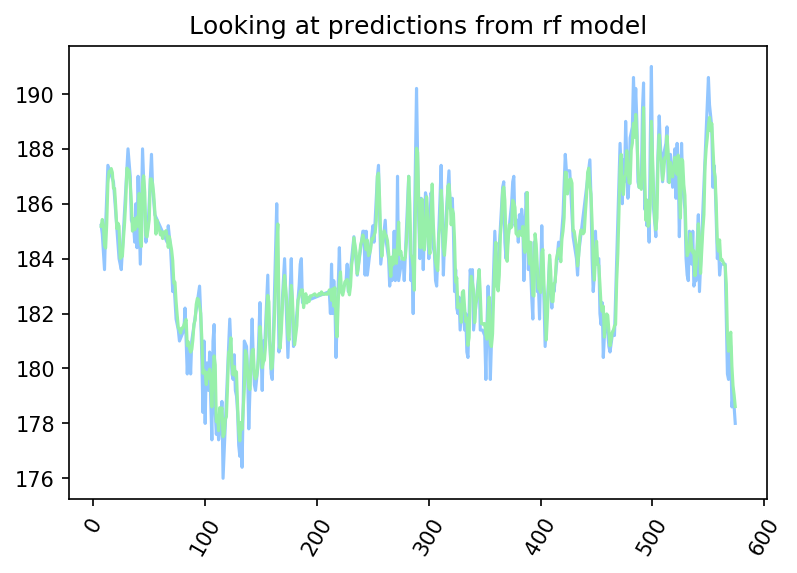

In [72]:
plt.figure(dpi=150)
plt.plot(X.index, y)
plt.plot(X.index, rf_weight_predictions)
plt.title("Looking at predictions from rf model")
plt.xticks(rotation=60);

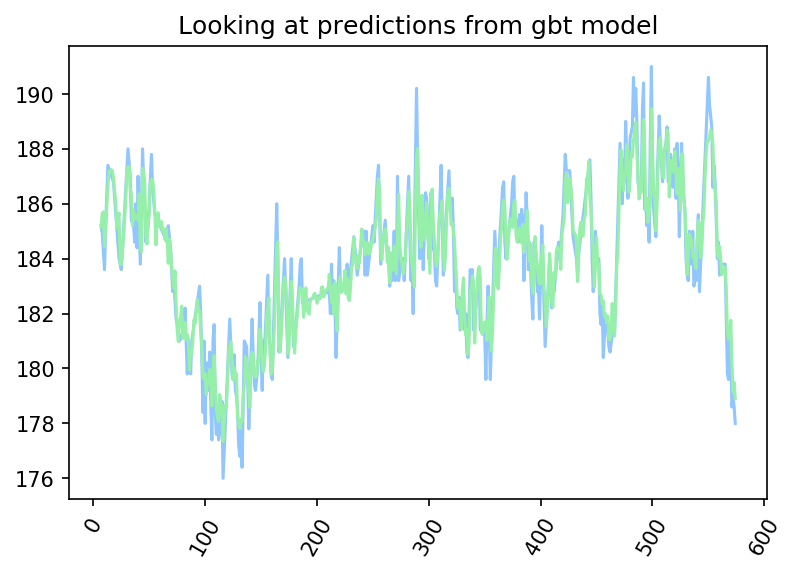

In [73]:
plt.figure(dpi=150)
plt.plot(X.index, y)
plt.plot(X.index, gbt_weight_predictions)
plt.title("Looking at predictions from gbt model")
plt.xticks(rotation=60);

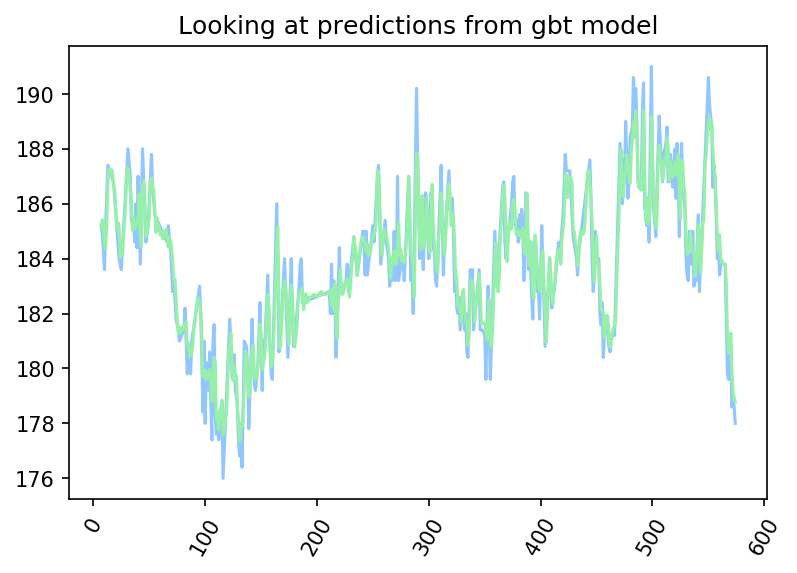

In [74]:
plt.figure(dpi=150)
plt.plot(X.index, y)
plt.plot(X.index, xgb_weight_predictions)
plt.title("Looking at predictions from gbt model")
plt.xticks(rotation=60);

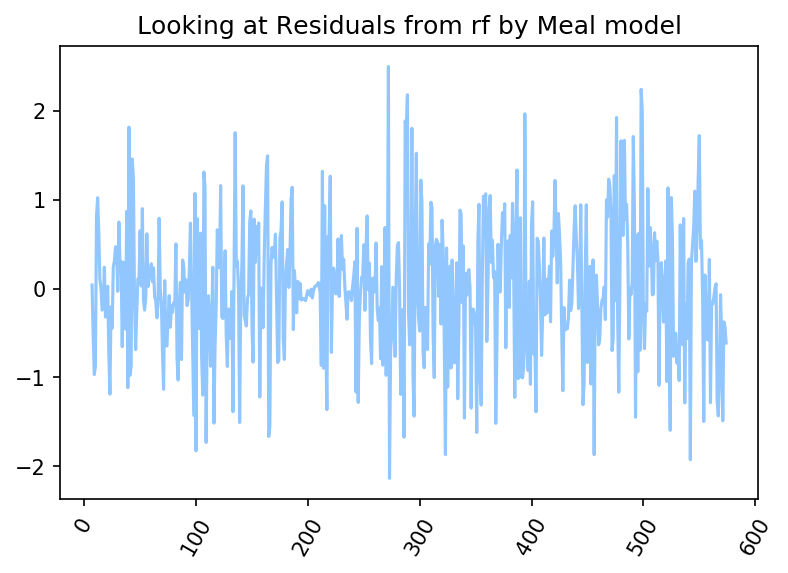

In [75]:
plt.figure(dpi=150)
plt.plot(X.index, y-rf_weight_predictions)
plt.title("Looking at Residuals from rf by Meal model")
plt.xticks(rotation=60);

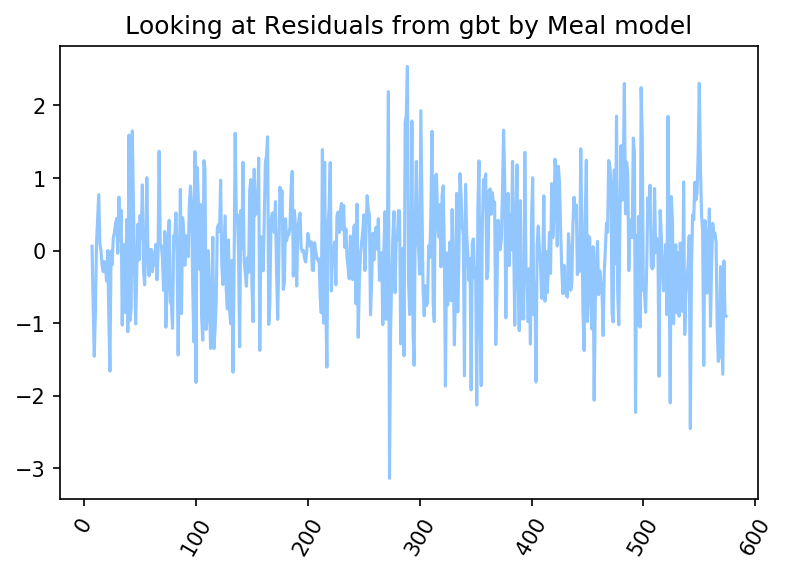

In [76]:
plt.figure(dpi=150)
plt.plot(X.index, y-gbt_weight_predictions)
plt.title("Looking at Residuals from gbt by Meal model")
plt.xticks(rotation=60);

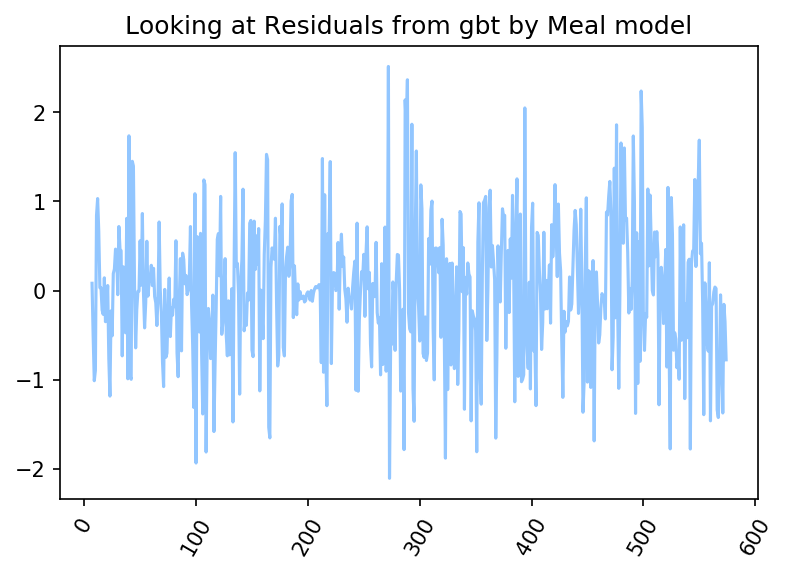

In [77]:
plt.figure(dpi=150)
plt.plot(X.index, y-xgb_weight_predictions)
plt.title("Looking at Residuals from gbt by Meal model")
plt.xticks(rotation=60);

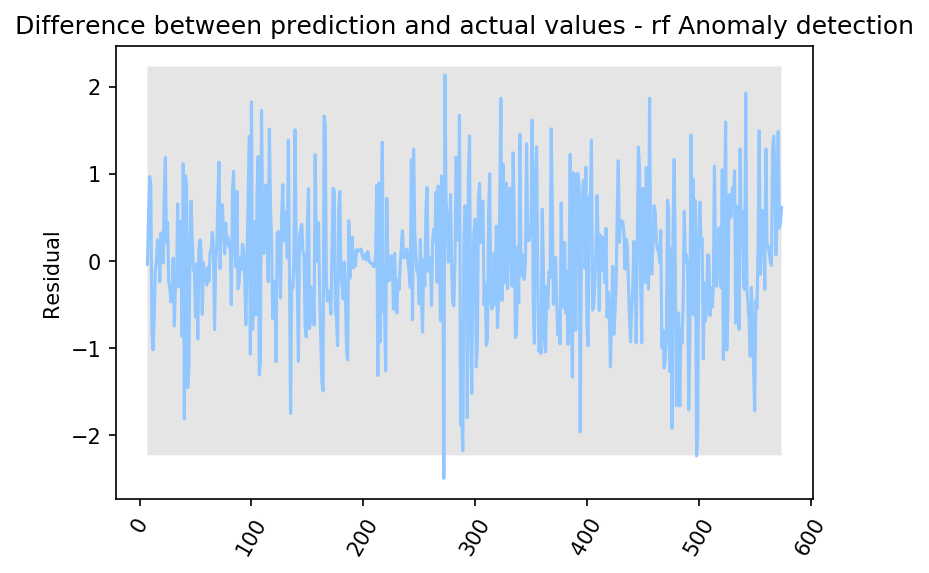

In [78]:
residual = rf_by_meal.predict(X) - y
std_residual = np.std(residual)

plt.figure(dpi=150)
plt.plot(X.index, residual)
plt.gca().fill_between(X.index, 3*std_residual, -3*std_residual, facecolor='gray', alpha=0.2)
plt.title("Difference between prediction and actual values - rf Anomaly detection")
plt.ylabel("Residual")
plt.xticks(rotation=60);

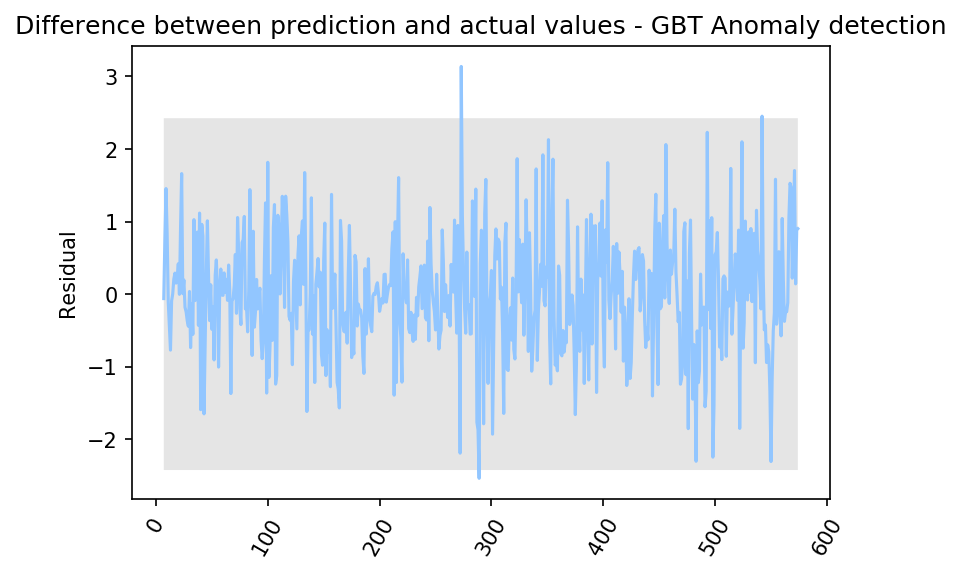

In [79]:
gbt_residual = gbt_by_meal.predict(X) - y
gbt_std_residual = np.std(gbt_residual)

plt.figure(dpi=150)
plt.plot(X.index, gbt_residual)
plt.gca().fill_between(X.index, 3*gbt_std_residual, -3*gbt_std_residual, facecolor='gray', alpha=0.2)
plt.title("Difference between prediction and actual values - GBT Anomaly detection")
plt.ylabel("Residual")
plt.xticks(rotation=60);

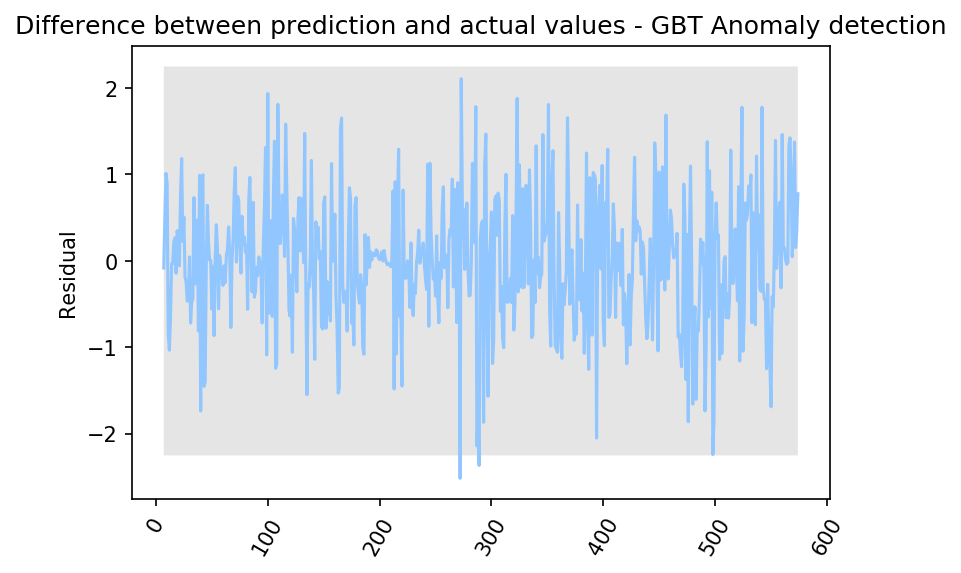

In [80]:
xgb_residual = rfq_by_meal.predict(X) - y
xgb_std_residual = np.std(xgb_residual)

plt.figure(dpi=150)
plt.plot(X.index, xgb_residual)
plt.gca().fill_between(X.index, 3*xgb_std_residual, -3*xgb_std_residual, facecolor='gray', alpha=0.2)
plt.title("Difference between prediction and actual values - GBT Anomaly detection")
plt.ylabel("Residual")
plt.xticks(rotation=60);

## POTENTIALL PRUNE ANOMALIES?

In [81]:
real_weight_predictions_rf = pd.Series(rf_weight_predictions, index=train_df.Weight.index[7:])

real_weight_predictions_gbt = pd.Series(gbt_weight_predictions, index=train_df.Weight.index[7:])

real_weight_predictions_xgb = pd.Series(xgb_weight_predictions, index=train_df.Weight.index[7:])

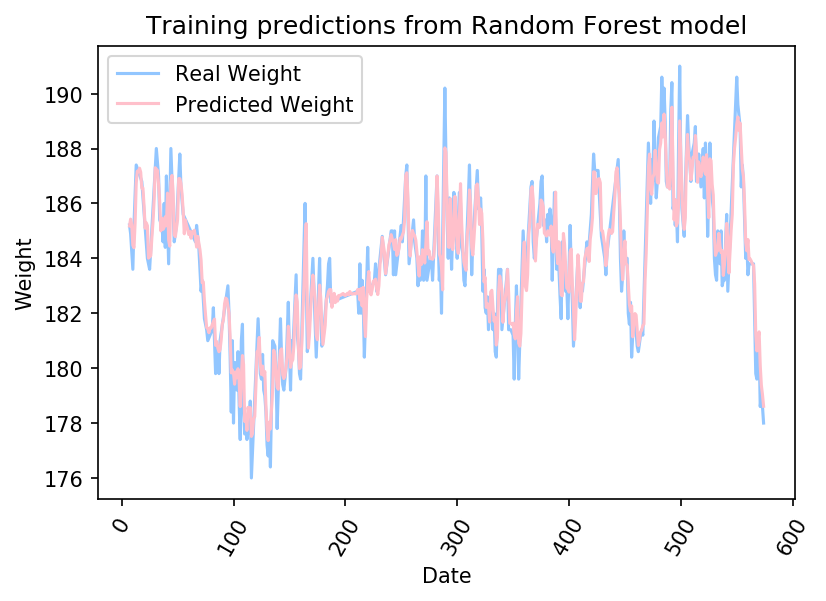

In [82]:
plt.figure(dpi=150)
plt.plot(X.index, train_df.Weight[7:], label='Real Weight')
plt.plot(X.index, real_weight_predictions_rf, label='Predicted Weight', color='pink')
plt.title("Training predictions from Random Forest model")
plt.xlabel('Date')
plt.ylabel('Weight')
plt.xticks(rotation=60)
plt.legend()
plt.savefig('/Users/brendenrossin/github/Project_Kojak/RF_Training.png', format='png', dpi=1000, bbox_inches="tight");

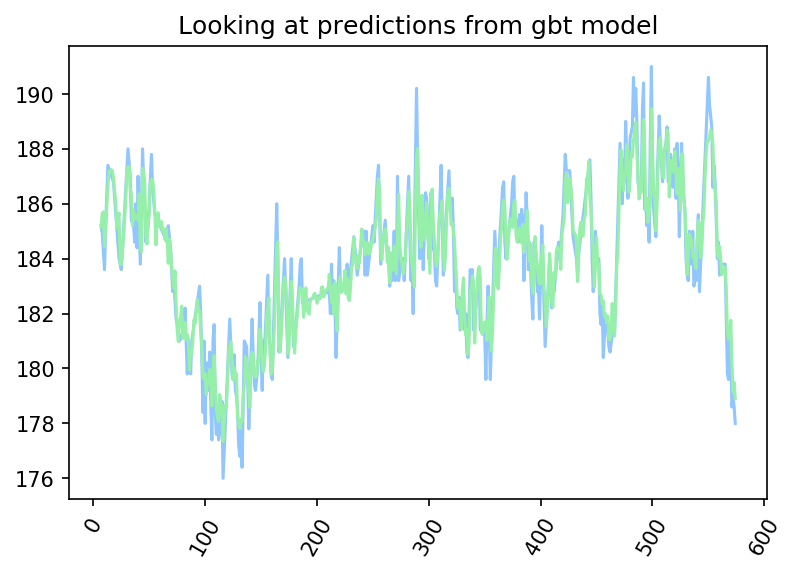

In [83]:
plt.figure(dpi=150)
plt.plot(X.index, train_df.Weight[7:])
plt.plot(X.index, real_weight_predictions_gbt)
plt.title("Looking at predictions from gbt model")
plt.xticks(rotation=60);

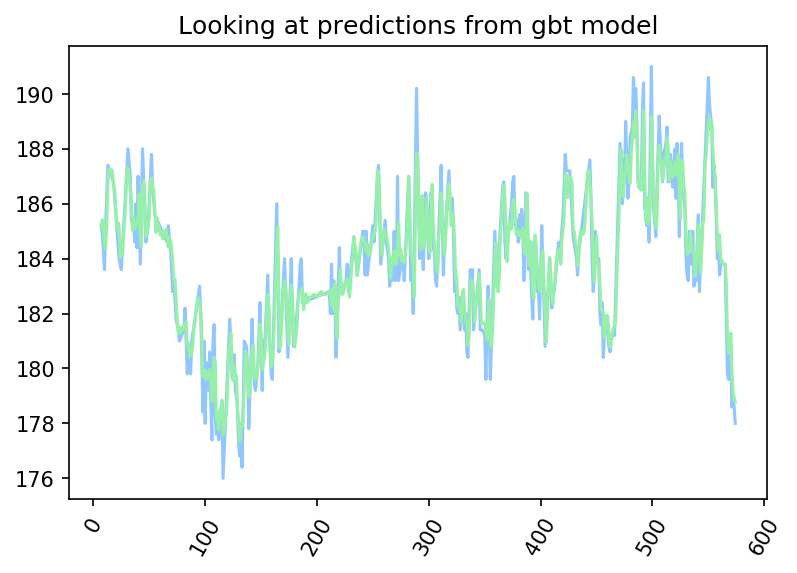

In [84]:
plt.figure(dpi=150)
plt.plot(X.index, train_df.Weight[7:])
plt.plot(X.index, real_weight_predictions_xgb)
plt.title("Looking at predictions from gbt model")
plt.xticks(rotation=60);

In [85]:
train_df['Predicted_weights_rf'] = np.nan
train_df['Predicted_weights_GBT'] = np.nan
train_df['Predicted_weights_XGB'] = np.nan

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [86]:
train_df['Predicted_weights_rf'][7:] = rf_weight_predictions
train_df['Predicted_weights_GBT'][7:] = gbt_weight_predictions
train_df['Predicted_weights_XGB'][7:] = xgb_weight_predictions

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code

In [87]:
#train_df['Predicted_weights'] = train_df['Predicted_weights'].shift(1)

In [88]:
train_df.set_index('Date', inplace=True)

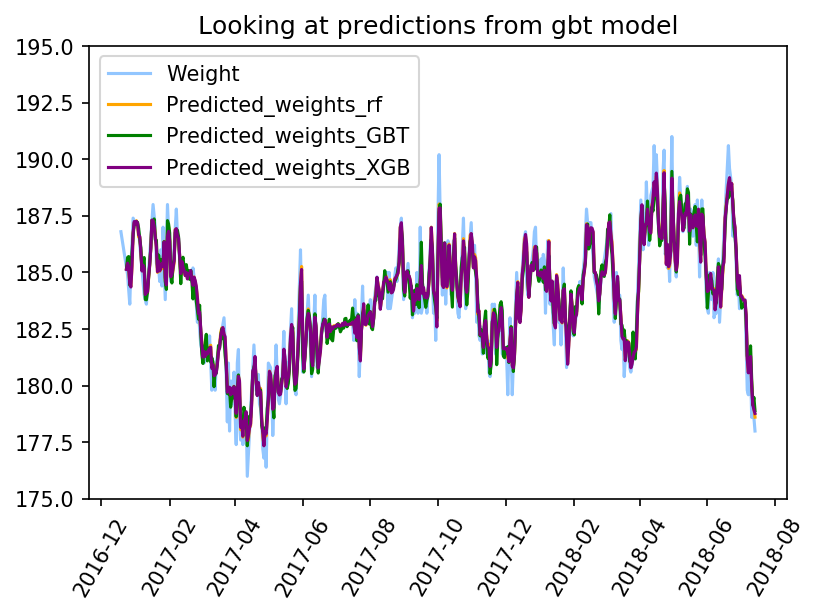

In [89]:
plt.figure(dpi=150)
plt.plot(train_df.index, train_df.Weight)
plt.plot(train_df.index, train_df.Predicted_weights_rf, color='orange')
plt.plot(train_df.index, train_df.Predicted_weights_GBT, color='green')
plt.plot(train_df.index, train_df.Predicted_weights_XGB, color='purple')
plt.title("Looking at predictions from gbt model")
plt.xticks(rotation=60)
plt.ylim(175, 195)
#plt.xlim(736700,736890)
plt.legend();

In [162]:
# fit better sarima
import statsmodels.api as sm

exog_vars = train_df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']]


sarima1 = sm.tsa.statespace.SARIMAX(dfWeight, order=(1,1,5), seasonal_order=(1,0,0,7), exog=exog_vars, trend='c').fit()
sarima1.summary()

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                            Weight   No. Observations:                  575
Model:             SARIMAX(1, 1, 5)x(1, 0, 0, 7)   Log Likelihood                -824.794
Date:                           Sat, 15 Sep 2018   AIC                           1737.588
Time:                                   17:38:53   BIC                           1929.181
Sample:                               12-17-2016   HQIC                          1812.313
                                    - 07-14-2018                                         
Covariance Type:                             opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                        -0.0180      0.036     -0.501      0.616      -0.089       0.053
Steps                            -2.2486      1.372     -1.639      0.101      -4.938       0.440
Minutes_Sedentary                -0.0135      0.666     -0.020      0.984      -1.319       1.292
Minutes_Lightly_Active            0.0290      0.528      0.055      0.956      -1.005       1.063
Minutes_Fairly_Active            -0.9315      0.623     -1.495      0.135      -2.152       0.289
Minutes_Very_Active              -0.5992      0.458     -1.307      0.191      -1.498       0.299
Calories_Breakfast               -0.5277      0.698     -0.756      0.450      -1.896       0.840
Saturated_Fat_Breakfast           0.0934      0.408      0.229      0.819      -0.706       0.893
Cholesterol_Breakfast             3.9679      2.669      1.487      0.137      -1.262       9.198
Polyunsaturated_Fat_Breakfast     0.2396      0.234      1.025      0.305      -0.218       0.697
Monounsaturated_Fat_Breakfast     0.0252      0.526      0.048      0.962      -1.005       1.056
Trans_Fat_Breakfast              -1.7734      0.716     -2.478      0.013      -3.176      -0.371
Carbohydrates_(g)_Breakfast      -0.7835      0.615     -1.274      0.203      -1.989       0.422
Sugar_Breakfast                  18.8047     13.450      1.398      0.162      -7.557      45.166
Sodium_(mg)_Breakfast             3.0300      1.976      1.533      0.125      -0.843       6.903
Protein_(g)_Breakfast             0.1442      0.467      0.308      0.758      -0.772       1.060
Calories_Lunch                    2.6952      1.587      1.699      0.089      -0.415       5.805
Saturated_Fat_Lunch              -0.5342      0.301     -1.775      0.076      -1.124       0.056
Polyunsaturated_Fat_Lunch        -0.5652      0.502     -1.126      0.260      -1.549       0.419
Monounsaturated_Fat_Lunch         1.1938      2.078      0.574      0.566      -2.879       5.267
Trans_Fat_Lunch                  -2.4838      2.468     -1.006      0.314      -7.322       2.354
Cholesterol_Lunch                -1.7098      5.126     -0.334      0.739     -11.757       8.337
Sodium_(mg)_Lunch                -0.2881      0.444     -0.650      0.516      -1.157       0.581
Carbohydrates_(g)_Lunch           4.6954      2.507      1.873      0.061      -0.219       9.610
Sugar_Lunch                      -0.6176      0.503     -1.227      0.220      -1.604       0.369
Protein_(g)_Lunch                 1.1470      0.977      1.174      0.240      -0.768       3.062
Calories_Dinner                  -0.3877      0.286     -1.353      0.176      -0.949       0.174
Saturated_Fat_Dinner             -2.3027      1.230     -1.872      0.061      -4.714       0.108
Polyunsaturated_Fat_Dinner        2.3933      1.220      1.961      0.050       0.002       4.785
Monoun

In [163]:
exog_vars_test = holdout_df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']]

sarima1_forecast = sarima1.forecast(steps=45, exog = exog_vars_test)

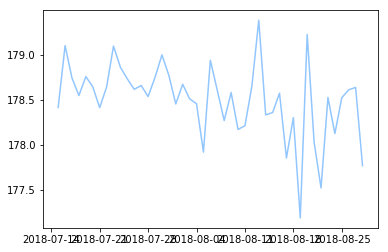

In [164]:
plt.plot(sarima1_forecast);

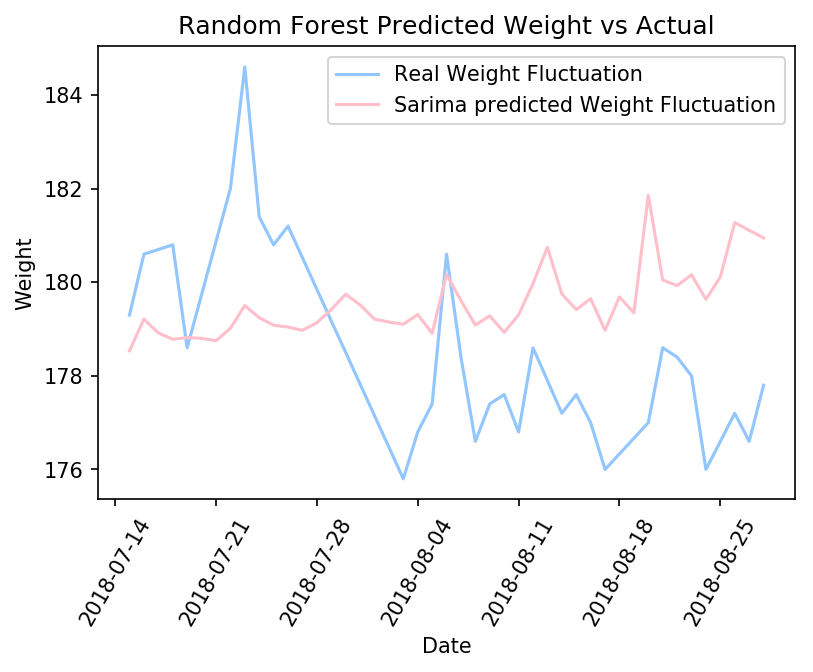

In [159]:
plt.figure(dpi=150)
plt.plot(HOLDOUT_X.index, HOLDOUT_y, label='Real Weight Fluctuation')
plt.plot(HOLDOUT_X.index, sarima1_forecast, label='Sarima predicted Weight Fluctuation', color='pink')
plt.title("Random Forest Predicted Weight vs Actual")
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend()
#plt.savefig('/Users/brendenrossin/github/Project_Kojak/RF_Forecast.png', format='png', dpi=1000, bbox_inches="tight");

## SHUFFLE RANDOM FOREST FEATURES TO VALIDATE -- ASK DAMIEN

In [91]:
# train_df.reset_index(inplace=True)

# train_df.dropna(subset=['Weight', 'Predicted_weights_GBT'], inplace=True)

# train_df.to_csv('Data/Kojak_train_weights.csv')

In [92]:
# train_df.set_index('Date', inplace=True)
# train_df.drop('index', axis=1 ,inplace=True)

train_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,Prophet_pred_lag6,Prophet_pred_lag7,lag1,lag2,lag3,lag4,lag5,Predicted_weights_rf,Predicted_weights_GBT,Predicted_weights_XGB
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-17,185.905264,183.237370,187.666015,185.227394,186.579877,-0.048451,-0.133188,0.038904,0.136084,0.038615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-18,185.901699,183.331106,187.614137,185.234425,186.561556,0.145822,-0.117091,0.400855,0.026452,0.007506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,185.898134,184.440722,188.727721,185.244041,186.538995,-0.075774,-0.208298,0.060844,-0.236487,-0.412853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-20,185.894570,185.353778,189.646055,185.273412,186.514960,-0.209305,-0.575367,0.168066,0.780612,0.221507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-21,185.891005,184.075723,188.536861,185.303485,186.489066,0.131447,-0.105548,0.361339,0.272366,0.077287,...,NaN,NaN,-0.316667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
dfWeight = train_df.Weight

In [94]:
# fit better sarima
# import statsmodels.api as sm

# exog_vars = train_df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
#        'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
#        'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
#        'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
#        'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
#        'Sodium_(mg)_Breakfast',
#        'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
#        'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
#        'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
#        'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
#        'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
#        'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
#        'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
#        'Sugar_Dinner', 'Protein_(g)_Dinner','diff_weight_lag1', 'diff_weight_weekly_lag']]


# sarima1 = sm.tsa.statespace.SARIMAX(dfWeight, order=(0,0,0), seasonal_order=(1,1,1,7), exog=exog_vars, trend='c').fit()
# sarima1.summary()

In [95]:
holdout_df.set_index('Date', inplace=True)

In [96]:
HOLDOUT_X = holdout_df.loc[:, ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner','Prophet_pred_lag1',
        'Prophet_pred_lag2', 'Prophet_pred_lag3', 'Prophet_pred_lag4', 'Prophet_pred_lag5',
        'Weight_lag1', 'Weight_lag2',
        'Weight_lag3', 'Weight_lag4', 'Weight_lag5']]

HOLDOUT_X = HOLDOUT_X.dropna()
HOLDOUT_y = holdout_df.loc[HOLDOUT_X.index, 'Weight']

#X_holdout_scaled = pd.DataFrame(ssX.transform(HOLDOUT_X), columns = HOLDOUT_X.columns)

models = [rf_by_meal, gbt_by_meal, rfq_by_meal]
names = ['rf Macros by Meal', 'GBT Macros by meal', 'RFQ Macros by meal']

print(f'Holdout TEST Scores')

for model, name in zip(models, names):

    HOLDOUT_y_pred_meal = model.predict(HOLDOUT_X)
    holdout_r2_score = np.round(model.score(HOLDOUT_X,HOLDOUT_y),4)
    holdout_adj_r2_score = np.round(1 - (1-model.score(HOLDOUT_X, HOLDOUT_y))*(len(HOLDOUT_y)-1)/(len(HOLDOUT_y)-HOLDOUT_X.shape[1]-1),4)
    holdout_mse_score = mean_squared_error(HOLDOUT_y,HOLDOUT_y_pred_meal)
    holdout_mae_score = mean_absolute_error(HOLDOUT_y,HOLDOUT_y_pred_meal)
    holdout_rmse_score = np.round(np.sqrt(holdout_mse_score),4)

    print(f'{name} HOLDOUT SET Final MAE: {holdout_mae_score}')
    print(f'{name} HOLDOUT SET Final RMSE: {holdout_rmse_score}')
    print(f'{name} HOLDOUT SET Final R^2: {holdout_r2_score}')

Holdout TEST Scores
rf Macros by Meal HOLDOUT SET Final MAE: 1.3033926806270761
rf Macros by Meal HOLDOUT SET Final RMSE: 1.4993
rf Macros by Meal HOLDOUT SET Final R^2: 0.3957
GBT Macros by meal HOLDOUT SET Final MAE: 1.4847878497008828
GBT Macros by meal HOLDOUT SET Final RMSE: 1.7202
GBT Macros by meal HOLDOUT SET Final R^2: 0.2045
RFQ Macros by meal HOLDOUT SET Final MAE: 1.3263107001221903
RFQ Macros by meal HOLDOUT SET Final RMSE: 1.5192
RFQ Macros by meal HOLDOUT SET Final R^2: 0.3795


In [126]:
HOLDOUT_y_pred_meal = gbt_by_meal.predict(HOLDOUT_X)

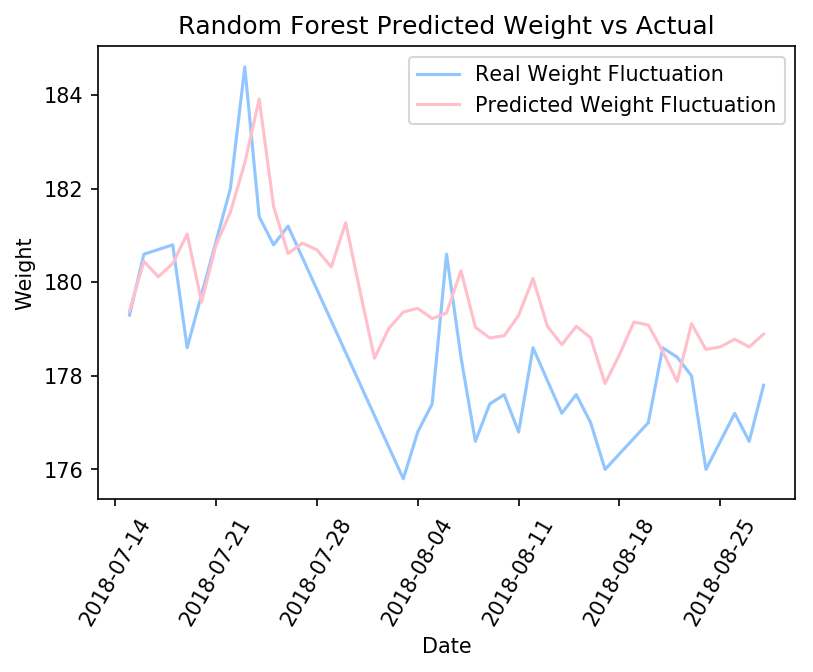

In [127]:
plt.figure(dpi=150)
plt.plot(HOLDOUT_X.index, HOLDOUT_y, label='Real Weight Fluctuation')
plt.plot(HOLDOUT_X.index, HOLDOUT_y_pred_meal, label='Predicted Weight Fluctuation', color='pink')
plt.title("Random Forest Predicted Weight vs Actual")
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend()
#plt.savefig('/Users/brendenrossin/github/Project_Kojak/RF_Forecast.png', format='png', dpi=1000, bbox_inches="tight");

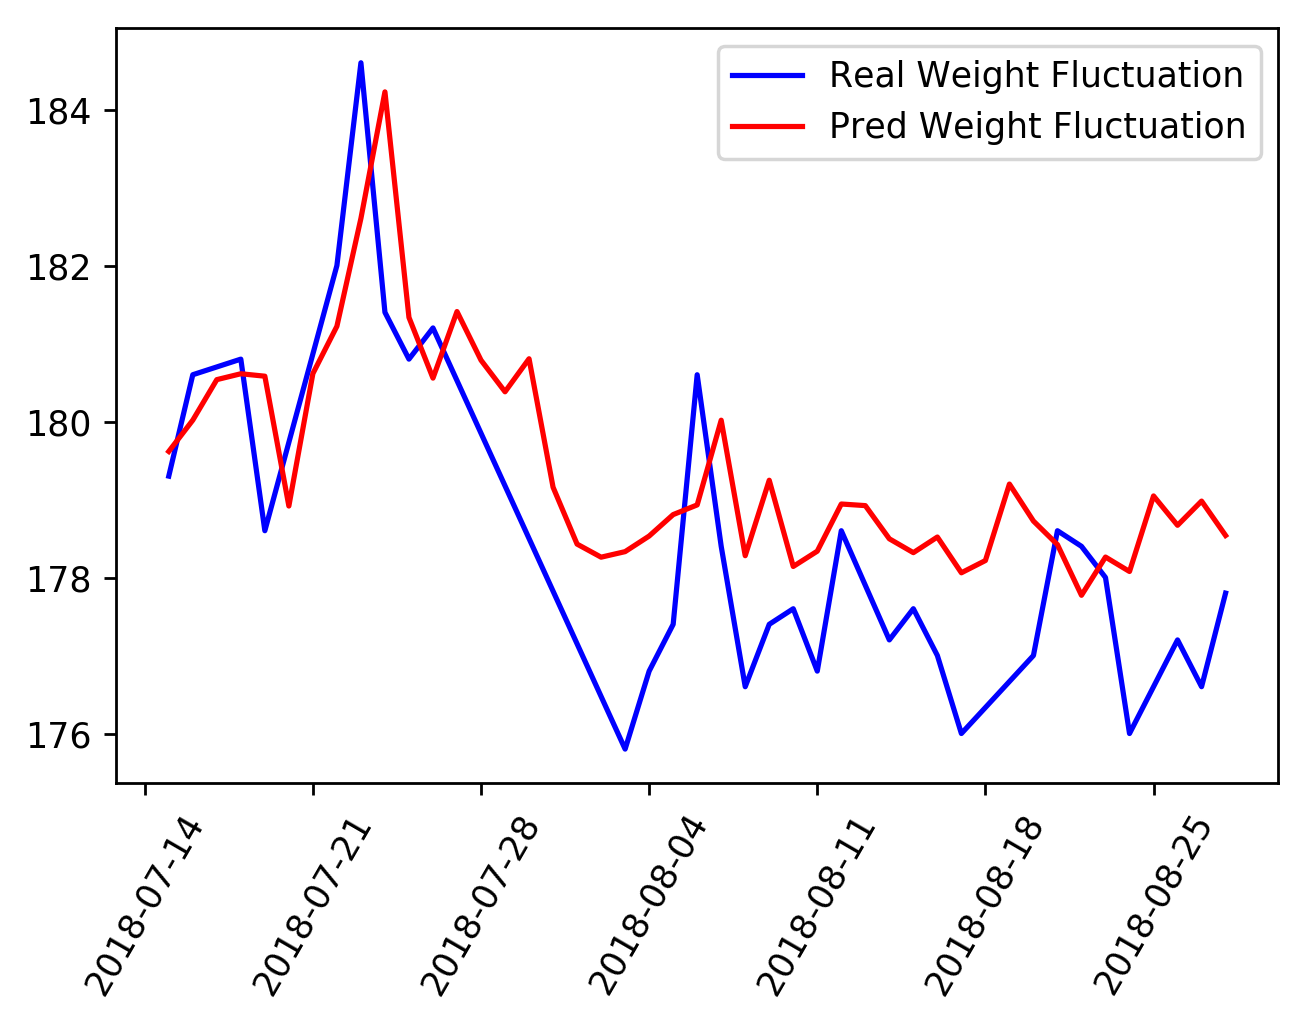

In [99]:
plt.figure(dpi=250)
plt.plot(HOLDOUT_y,color='blue',label='Real Weight Fluctuation')
hold_y_pred = pd.Series(HOLDOUT_y_pred_meal, index=HOLDOUT_y.index)
plt.plot(hold_y_pred, color='red',label='Pred Weight Fluctuation')
plt.xticks(rotation=60)
plt.legend()

In [100]:
final_weight_predictions_cumsum = HOLDOUT_y_pred_meal.cumsum()

In [101]:
holdout_df.Weight

Date
2018-07-15    179.300000
2018-07-16    180.600000
2018-07-17    180.700000
2018-07-18    180.800000
2018-07-19    178.600000
2018-07-20    179.733333
2018-07-21    180.866667
2018-07-22    182.000000
2018-07-23    184.600000
2018-07-24    181.400000
2018-07-25    180.800000
2018-07-26    181.200000
2018-07-27    180.525000
2018-07-28    179.850000
2018-07-29    179.175000
2018-07-30    178.500000
2018-07-31    177.825000
2018-08-01    177.150000
2018-08-02    176.475000
2018-08-03    175.800000
2018-08-04    176.800000
2018-08-05    177.400000
2018-08-06    180.600000
2018-08-07    178.400000
2018-08-08    176.600000
2018-08-09    177.400000
2018-08-10    177.600000
2018-08-11    176.800000
2018-08-12    178.600000
2018-08-13    177.900000
2018-08-14    177.200000
2018-08-15    177.600000
2018-08-16    177.000000
2018-08-17    176.000000
2018-08-18    176.333333
2018-08-19    176.666667
2018-08-20    177.000000
2018-08-21    178.600000
2018-08-22    178.400000
2018-08-23    178.00

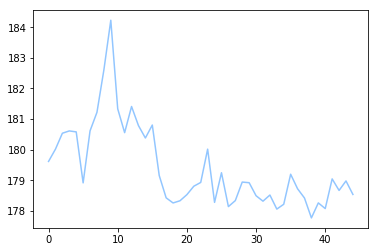

In [102]:
plt.plot(HOLDOUT_y_pred_meal)

In [103]:
np.mean(HOLDOUT_y)

178.4666666666667

In [104]:
np.mean(HOLDOUT_y_pred_meal)

179.41921236307766

In [105]:
final_weight_predictions_cumsum

array([ 179.61639171,  359.63415014,  540.17125412,  720.78380532,
        901.36507621, 1080.28162487, 1260.8963692 , 1442.11772244,
       1624.72238113, 1808.94904164, 1990.28381882, 2170.84022885,
       2352.25047907, 2533.03696643, 2713.41840866, 2894.22336783,
       3073.38085073, 3251.80937678, 3430.07018342, 3608.40217312,
       3786.93402213, 3965.74086623, 4144.67175471, 4324.68881418,
       4502.96866253, 4682.21599283, 4860.35786565, 5038.69566471,
       5217.63820222, 5396.56018458, 5575.05676923, 5753.37557139,
       5931.89488741, 6109.95558393, 6288.1734524 , 6467.37196463,
       6646.09609469, 6824.51775274, 7002.29002051, 7180.55243728,
       7358.62974209, 7537.67595111, 7716.34553962, 7895.32558864,
       8073.86455634])

In [106]:
final_weight_predictions = pd.Series(HOLDOUT_y_pred_meal, index=holdout_df.Weight.index)

# final_weight_predictions = final_weight_predictions.shift(-1)

final_weight_predictions

Date
2018-07-15    179.616392
2018-07-16    180.017758
2018-07-17    180.537104
2018-07-18    180.612551
2018-07-19    180.581271
2018-07-20    178.916549
2018-07-21    180.614744
2018-07-22    181.221353
2018-07-23    182.604659
2018-07-24    184.226661
2018-07-25    181.334777
2018-07-26    180.556410
2018-07-27    181.410250
2018-07-28    180.786487
2018-07-29    180.381442
2018-07-30    180.804959
2018-07-31    179.157483
2018-08-01    178.428526
2018-08-02    178.260807
2018-08-03    178.331990
2018-08-04    178.531849
2018-08-05    178.806844
2018-08-06    178.930888
2018-08-07    180.017059
2018-08-08    178.279848
2018-08-09    179.247330
2018-08-10    178.141873
2018-08-11    178.337799
2018-08-12    178.942538
2018-08-13    178.921982
2018-08-14    178.496585
2018-08-15    178.318802
2018-08-16    178.519316
2018-08-17    178.060697
2018-08-18    178.217868
2018-08-19    179.198512
2018-08-20    178.724130
2018-08-21    178.421658
2018-08-22    177.772268
2018-08-23    178.26

In [107]:
holdout_df.Weight

Date
2018-07-15    179.300000
2018-07-16    180.600000
2018-07-17    180.700000
2018-07-18    180.800000
2018-07-19    178.600000
2018-07-20    179.733333
2018-07-21    180.866667
2018-07-22    182.000000
2018-07-23    184.600000
2018-07-24    181.400000
2018-07-25    180.800000
2018-07-26    181.200000
2018-07-27    180.525000
2018-07-28    179.850000
2018-07-29    179.175000
2018-07-30    178.500000
2018-07-31    177.825000
2018-08-01    177.150000
2018-08-02    176.475000
2018-08-03    175.800000
2018-08-04    176.800000
2018-08-05    177.400000
2018-08-06    180.600000
2018-08-07    178.400000
2018-08-08    176.600000
2018-08-09    177.400000
2018-08-10    177.600000
2018-08-11    176.800000
2018-08-12    178.600000
2018-08-13    177.900000
2018-08-14    177.200000
2018-08-15    177.600000
2018-08-16    177.000000
2018-08-17    176.000000
2018-08-18    176.333333
2018-08-19    176.666667
2018-08-20    177.000000
2018-08-21    178.600000
2018-08-22    178.400000
2018-08-23    178.00

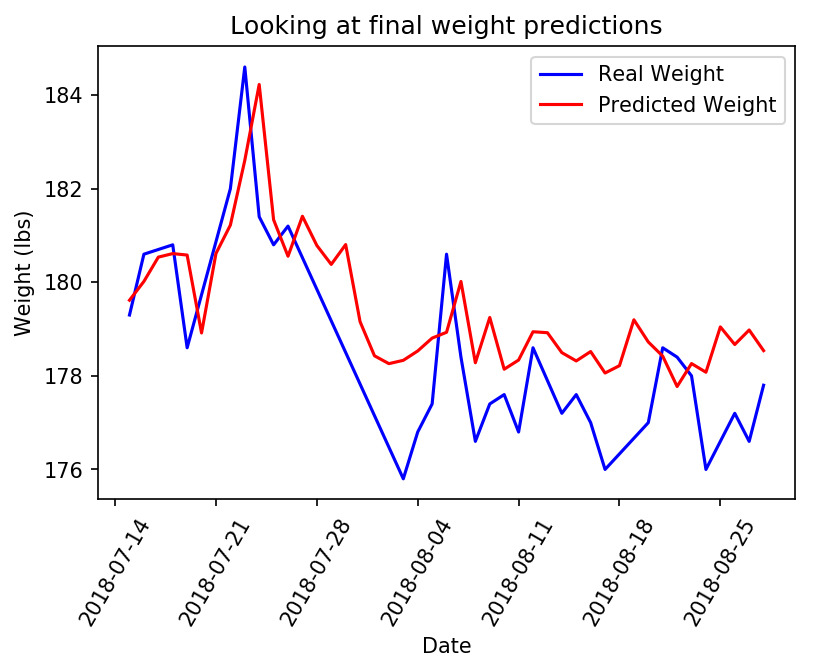

In [108]:
plt.figure(dpi=150)
plt.plot(holdout_df.index, holdout_df.Weight, color='blue',label='Real Weight')
plt.plot(holdout_df.index, final_weight_predictions, color='red',label='Predicted Weight')
plt.title("Looking at final weight predictions")
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.xticks(rotation=60)
plt.legend();

In [109]:
holdout_df['Final_predicted_weights'] = np.nan

holdout_df['Final_predicted_weights'] = HOLDOUT_y_pred_meal

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


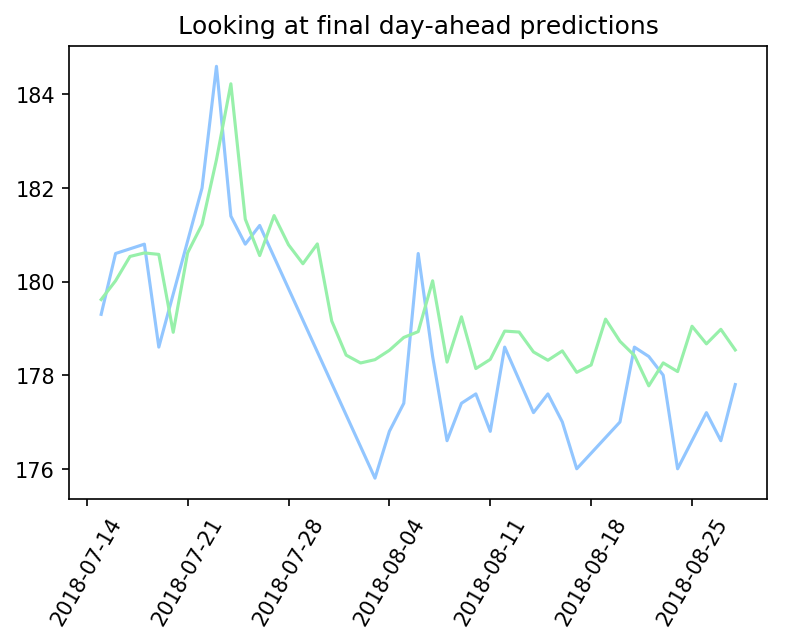

In [110]:
plt.figure(dpi=150)
plt.plot(holdout_df.index, holdout_df.Weight)
plt.plot(holdout_df.index, holdout_df.Final_predicted_weights)
plt.title("Looking at final day-ahead predictions")
plt.xticks(rotation=60);

In [111]:
holdout_df.Weight.values

array([179.3       , 180.6       , 180.7       , 180.8       ,
       178.6       , 179.73333333, 180.86666667, 182.        ,
       184.6       , 181.4       , 180.8       , 181.2       ,
       180.525     , 179.85      , 179.175     , 178.5       ,
       177.825     , 177.15      , 176.475     , 175.8       ,
       176.8       , 177.4       , 180.6       , 178.4       ,
       176.6       , 177.4       , 177.6       , 176.8       ,
       178.6       , 177.9       , 177.2       , 177.6       ,
       177.        , 176.        , 176.33333333, 176.66666667,
       177.        , 178.6       , 178.4       , 178.        ,
       176.        , 176.6       , 177.2       , 176.6       ,
       177.8       ])

In [112]:
HOLDOUT_y_pred_meal

array([179.61639171, 180.01775843, 180.53710398, 180.6125512 ,
       180.58127089, 178.91654866, 180.61474433, 181.22135325,
       182.60465869, 184.2266605 , 181.33477719, 180.55641003,
       181.41025022, 180.78648736, 180.38144224, 180.80495916,
       179.1574829 , 178.42852605, 178.26080664, 178.3319897 ,
       178.53184902, 178.80684409, 178.93088848, 180.01705947,
       178.27984835, 179.24733029, 178.14187282, 178.33779906,
       178.94253751, 178.92198236, 178.49658465, 178.31880216,
       178.51931602, 178.06069652, 178.21786846, 179.19851224,
       178.72413006, 178.42165804, 177.77226777, 178.26241677,
       178.07730481, 179.04620902, 178.6695885 , 178.98004902,
       178.5389677 ])

In [113]:
holdout_df.Weight.values[0] + HOLDOUT_y_pred_meal[0]

358.9163917106987

In [114]:
holdout_df.Weight.values + HOLDOUT_y_pred_meal

array([358.91639171, 360.61775843, 361.23710398, 361.4125512 ,
       359.18127089, 358.64988199, 361.48141099, 363.22135325,
       367.20465869, 365.6266605 , 362.13477719, 361.75641003,
       361.93525022, 360.63648736, 359.55644224, 359.30495916,
       356.9824829 , 355.57852605, 354.73580664, 354.1319897 ,
       355.33184902, 356.20684409, 359.53088848, 358.41705947,
       354.87984835, 356.64733029, 355.74187282, 355.13779906,
       357.54253751, 356.82198236, 355.69658465, 355.91880216,
       355.51931602, 354.06069652, 354.5512018 , 355.8651789 ,
       355.72413006, 357.02165804, 356.17226777, 356.26241677,
       354.07730481, 355.64620902, 355.8695885 , 355.58004902,
       356.3389677 ])

In [115]:
def _forecast_error(self, steps=1):
    sigma2 = self.sigma2
    ma_rep = arma2ma(np.r_[1, -self.arparams],
                     np.r_[1, self.maparams], lags=steps)

    fcasterr = np.sqrt(sigma2 * np.cumsum(ma_rep**2))
    return fcasterr

def _forecast_conf_int(self, forecast, fcasterr, alpha):
    const = norm.ppf(1 - alpha / 2.)
    conf_int = np.c_[forecast - const * fcasterr,
                     forecast + const * fcasterr]

    return conf_int

In [116]:
import numpy as np
import scipy.stats

def mean_confidence_interval(forecast, confidence=0.95):
    #a = 1.0 * np.array(data)
    n = len(forecast)
    m, se = np.mean(forecast), scipy.stats.sem(forecast)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [117]:
mean_confidence_interval(holdout_df.Final_predicted_weights)

(179.41921236307766, 179.01059093549742, 179.8278337906579)

In [118]:
def forecast_conf_int(forecast, fcasterr, alpha):
    const = norm.ppf(1 - alpha / 2.)
    conf_int = np.c_[forecast - const * fcasterr,
                        forecast + const * fcasterr]

In [119]:
# fit sarima
# import statsmodels.api as sm

# #train_df.set_index('Date', inplace=True)

# exog_vars = train_df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
#        'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
#        'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
#        'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
#        'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
#        'Sodium_(mg)_Breakfast',
#        'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
#        'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
#        'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
#        'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
#        'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
#        'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
#        'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
#        'Sugar_Dinner', 'Protein_(g)_Dinner', 'diff_weight_MA2',
#              'diff_weight_MA3', 'diff_weight_MA4', 'diff_weight_MA5', 'diff_weight_MA6', 'diff_weight_MA7']][:-3]


# sarima1 = sm.tsa.statespace.SARIMAX(train_df.Weight[:-3], order=(5,1,7), seasonal_order=(1,0,0,7), exog=exog_vars, trend='c').fit()
# sarima1.summary()

In [120]:
# exog_vars = holdout_df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
#        'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
#        'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
#        'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
#        'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
#        'Sodium_(mg)_Breakfast',
#        'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
#        'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
#        'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
#        'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
#        'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
#        'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
#        'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
#        'Sugar_Dinner', 'Protein_(g)_Dinner', 'diff_weight_MA2',
#              'diff_weight_MA3', 'diff_weight_MA4', 'diff_weight_MA5', 'diff_weight_MA6', 'diff_weight_MA7']]

# forecast = sarima1.forecast(steps=len(HOLDOUT_X),exog=exog_vars)

In [121]:
forecast = forecast.shift(3)

NameError: name 'forecast' is not defined

In [ ]:
forecast

In [ ]:
plt.figure(dpi=250)
plt.plot(holdout_df.Weight)
plt.plot(forecast)
plt.xticks(rotation=60)

In [ ]:
plt.figure(dpi=250)
plt.plot(holdout_df.Weight)
plt.plot(forecast)
plt.xticks(rotation=60)

In [ ]:
forecast_cumsum = forecast

In [ ]:
train_df.index

In [ ]:
df.columns